In [263]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import binarize
from sklearn.metrics import precision_recall_fscore_support
from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA



In [264]:
#Import and explore the data.
#import first data set
df1 = pd.read_csv('signal-data.csv')
#Shape of first data set
df1.shape

(1567, 592)

In [265]:
#Drop Time feature
df1=df1.drop(['Time'],axis=1)

In [266]:
df1.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 591, dtype: object

In [267]:
#Data types of each features
df1.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 591, dtype: object

In [268]:
#import second data set and drop Time column
df2 = pd.read_excel('Future_predictions.xlsx')
df2.shape
df2=df2.drop(['Time'],axis=1)

In [269]:
cols = df2.select_dtypes(exclude=['float64']).columns

df2[cols] = df2[cols].astype('float64')

In [270]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 590 entries, 0 to 589
dtypes: float64(590)
memory usage: 83.1 KB


In [271]:
#Shape of second dataset
df2.shape

(18, 590)

In [272]:
#Select all features of df1 in new dataframe except target feature 'Pass/Fail'
new= df1.loc[:, df1.columns != 'Pass/Fail']
new.shape
new.sort_index()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [273]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 590 entries, 0 to 589
dtypes: float64(590)
memory usage: 7.1 MB


In [274]:
#Check validation dataset
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [275]:
#Check past dataset having no target feature
new.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [276]:
#Now Concat both past dataset and future data set in frame_combined dataframe
frames = [new, df2]
new.columns = df2.columns
frame_combined = pd.concat([new, df2], ignore_index=True)
#Final shape
frame_combined.shape

(1585, 590)

In [277]:
#Checked frame_combined dataset information. How many rows and columns and rows are present
frame_combined.head(2000)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,3051.44,2529.27,2184.4333,877.6266,1.4668,100.0,107.8711,0.1240,1.5236,-0.0209,...,NaN,NaN,0.5034,0.0151,0.0038,3.0063,0.0188,0.0098,0.0034,52.2039
1581,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,0.0144,...,0.0084,142.9080,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080
1582,2988.31,2546.26,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.5465,0.0250,...,0.0045,100.2745,0.5058,0.0078,0.0021,1.5352,0.0174,0.0174,0.0045,100.2745
1583,3028.02,2560.87,2270.2556,1258.4558,1.3950,100.0,104.8078,0.1207,1.4368,0.0150,...,0.0042,82.0989,0.5005,0.0108,0.0034,2.1574,0.0184,0.0151,0.0042,82.0989


In [278]:
#Data cleansing:
#Missing value treatment.
#counting the number of missing values in each column
frame_combined.isnull().sum()

0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     2
587     2
588     2
589     2
Length: 590, dtype: int64

In [279]:
#Replace N/A values with median
frame_combined = frame_combined.fillna(frame_combined.median())

In [280]:
#Check any null value present
frame_combined.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Length: 590, dtype: int64

In [281]:
#multivariate analysis
frame_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1585.0,3014.281899,73.257830,2743.2400,2966.3900,3011.49000,3056.4000,3356.3500
1,1585.0,2496.212543,80.168557,2158.7500,2453.3400,2499.72000,2539.3700,2846.4400
2,1585.0,2200.803166,29.454930,2060.6600,2181.1889,2201.06670,2218.0555,2315.2667
3,1585.0,1393.149438,438.626212,0.0000,1081.8758,1283.43680,1588.5090,3715.0417
4,1585.0,4.137638,55.784931,0.6815,1.0177,1.31680,1.5188,1114.5366
...,...,...,...,...,...,...,...,...
585,1585.0,3.128801,4.303218,1.1975,2.3059,2.76035,3.2954,99.3032
586,1585.0,0.021488,0.012346,-0.0169,0.0135,0.02050,0.0276,0.1028
587,1585.0,0.016500,0.008807,0.0032,0.0106,0.01480,0.0203,0.0799
588,1585.0,0.005290,0.002864,0.0010,0.0034,0.00460,0.0064,0.0286


In [282]:
#Drop attribute/s if required using relevant functional knowledge.
#dropping the columns the have constant signal
cols = frame_combined.select_dtypes([np.number]).columns
std = frame_combined[cols].std()
cols_to_drop = std[std==0].index
frame_combined.drop(cols_to_drop, axis=1,inplace=True)
frame_combined.head()

#Make Copy of frame_combined for future use
frame_combined_future_used = frame_combined.copy()

In [283]:
#after dropping the constant signal
row,column=frame_combined.shape
print('After dropping the constant signals the dataset contains', row, 'rows and', column, 'columns')


After dropping the constant signals the dataset contains 1585 rows and 474 columns


In [284]:
# Create correlation matrix
cor_matrix = frame_combined.corr().abs()

print(cor_matrix)

          0         1         2         3         4         6         7    \
0    1.000000  0.143653  0.005506  0.006011  0.010685  0.002795  0.031130   
1    0.143653  1.000000  0.009618  0.012529  0.002135  0.022611  0.012834   
2    0.005506  0.009618  1.000000  0.291117  0.094629  0.129765  0.147252   
3    0.006011  0.012529  0.291117  1.000000  0.057909  0.686742  0.087925   
4    0.010685  0.002135  0.094629  0.057909  1.000000  0.074426  0.343285   
..        ...       ...       ...       ...       ...       ...       ...   
585  0.022184  0.001818  0.027623  0.020312  0.002029  0.035205  0.011844   
586  0.014477  0.009673  0.027465  0.037176  0.043725  0.044006  0.058972   
587  0.028874  0.019786  0.029344  0.036974  0.030980  0.031347  0.020827   
588  0.030879  0.011911  0.031143  0.031783  0.026110  0.029894  0.020399   
589  0.005547  0.044492  0.032583  0.079820  0.050816  0.043724  0.108026   

          8         9         10   ...       580       581       582  \
0  

In [285]:
# Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)


# Find features with correlation greater than 0.90
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


# Drop features and check frame_combined shape
frame_combined.drop(to_drop, axis=1, inplace=True)
frame_combined.shape


     0         1         2         3         4         6         7    \
0    NaN  0.143653  0.005506  0.006011  0.010685  0.002795  0.031130   
1    NaN       NaN  0.009618  0.012529  0.002135  0.022611  0.012834   
2    NaN       NaN       NaN  0.291117  0.094629  0.129765  0.147252   
3    NaN       NaN       NaN       NaN  0.057909  0.686742  0.087925   
4    NaN       NaN       NaN       NaN       NaN  0.074426  0.343285   
..   ...       ...       ...       ...       ...       ...       ...   
585  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
586  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
587  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
588  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
589  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          8         9         10   ...       580       581       582  \
0    0.052905  0.008094  0.004970  ...  0.059396  0.032702  0.0

(1585, 263)

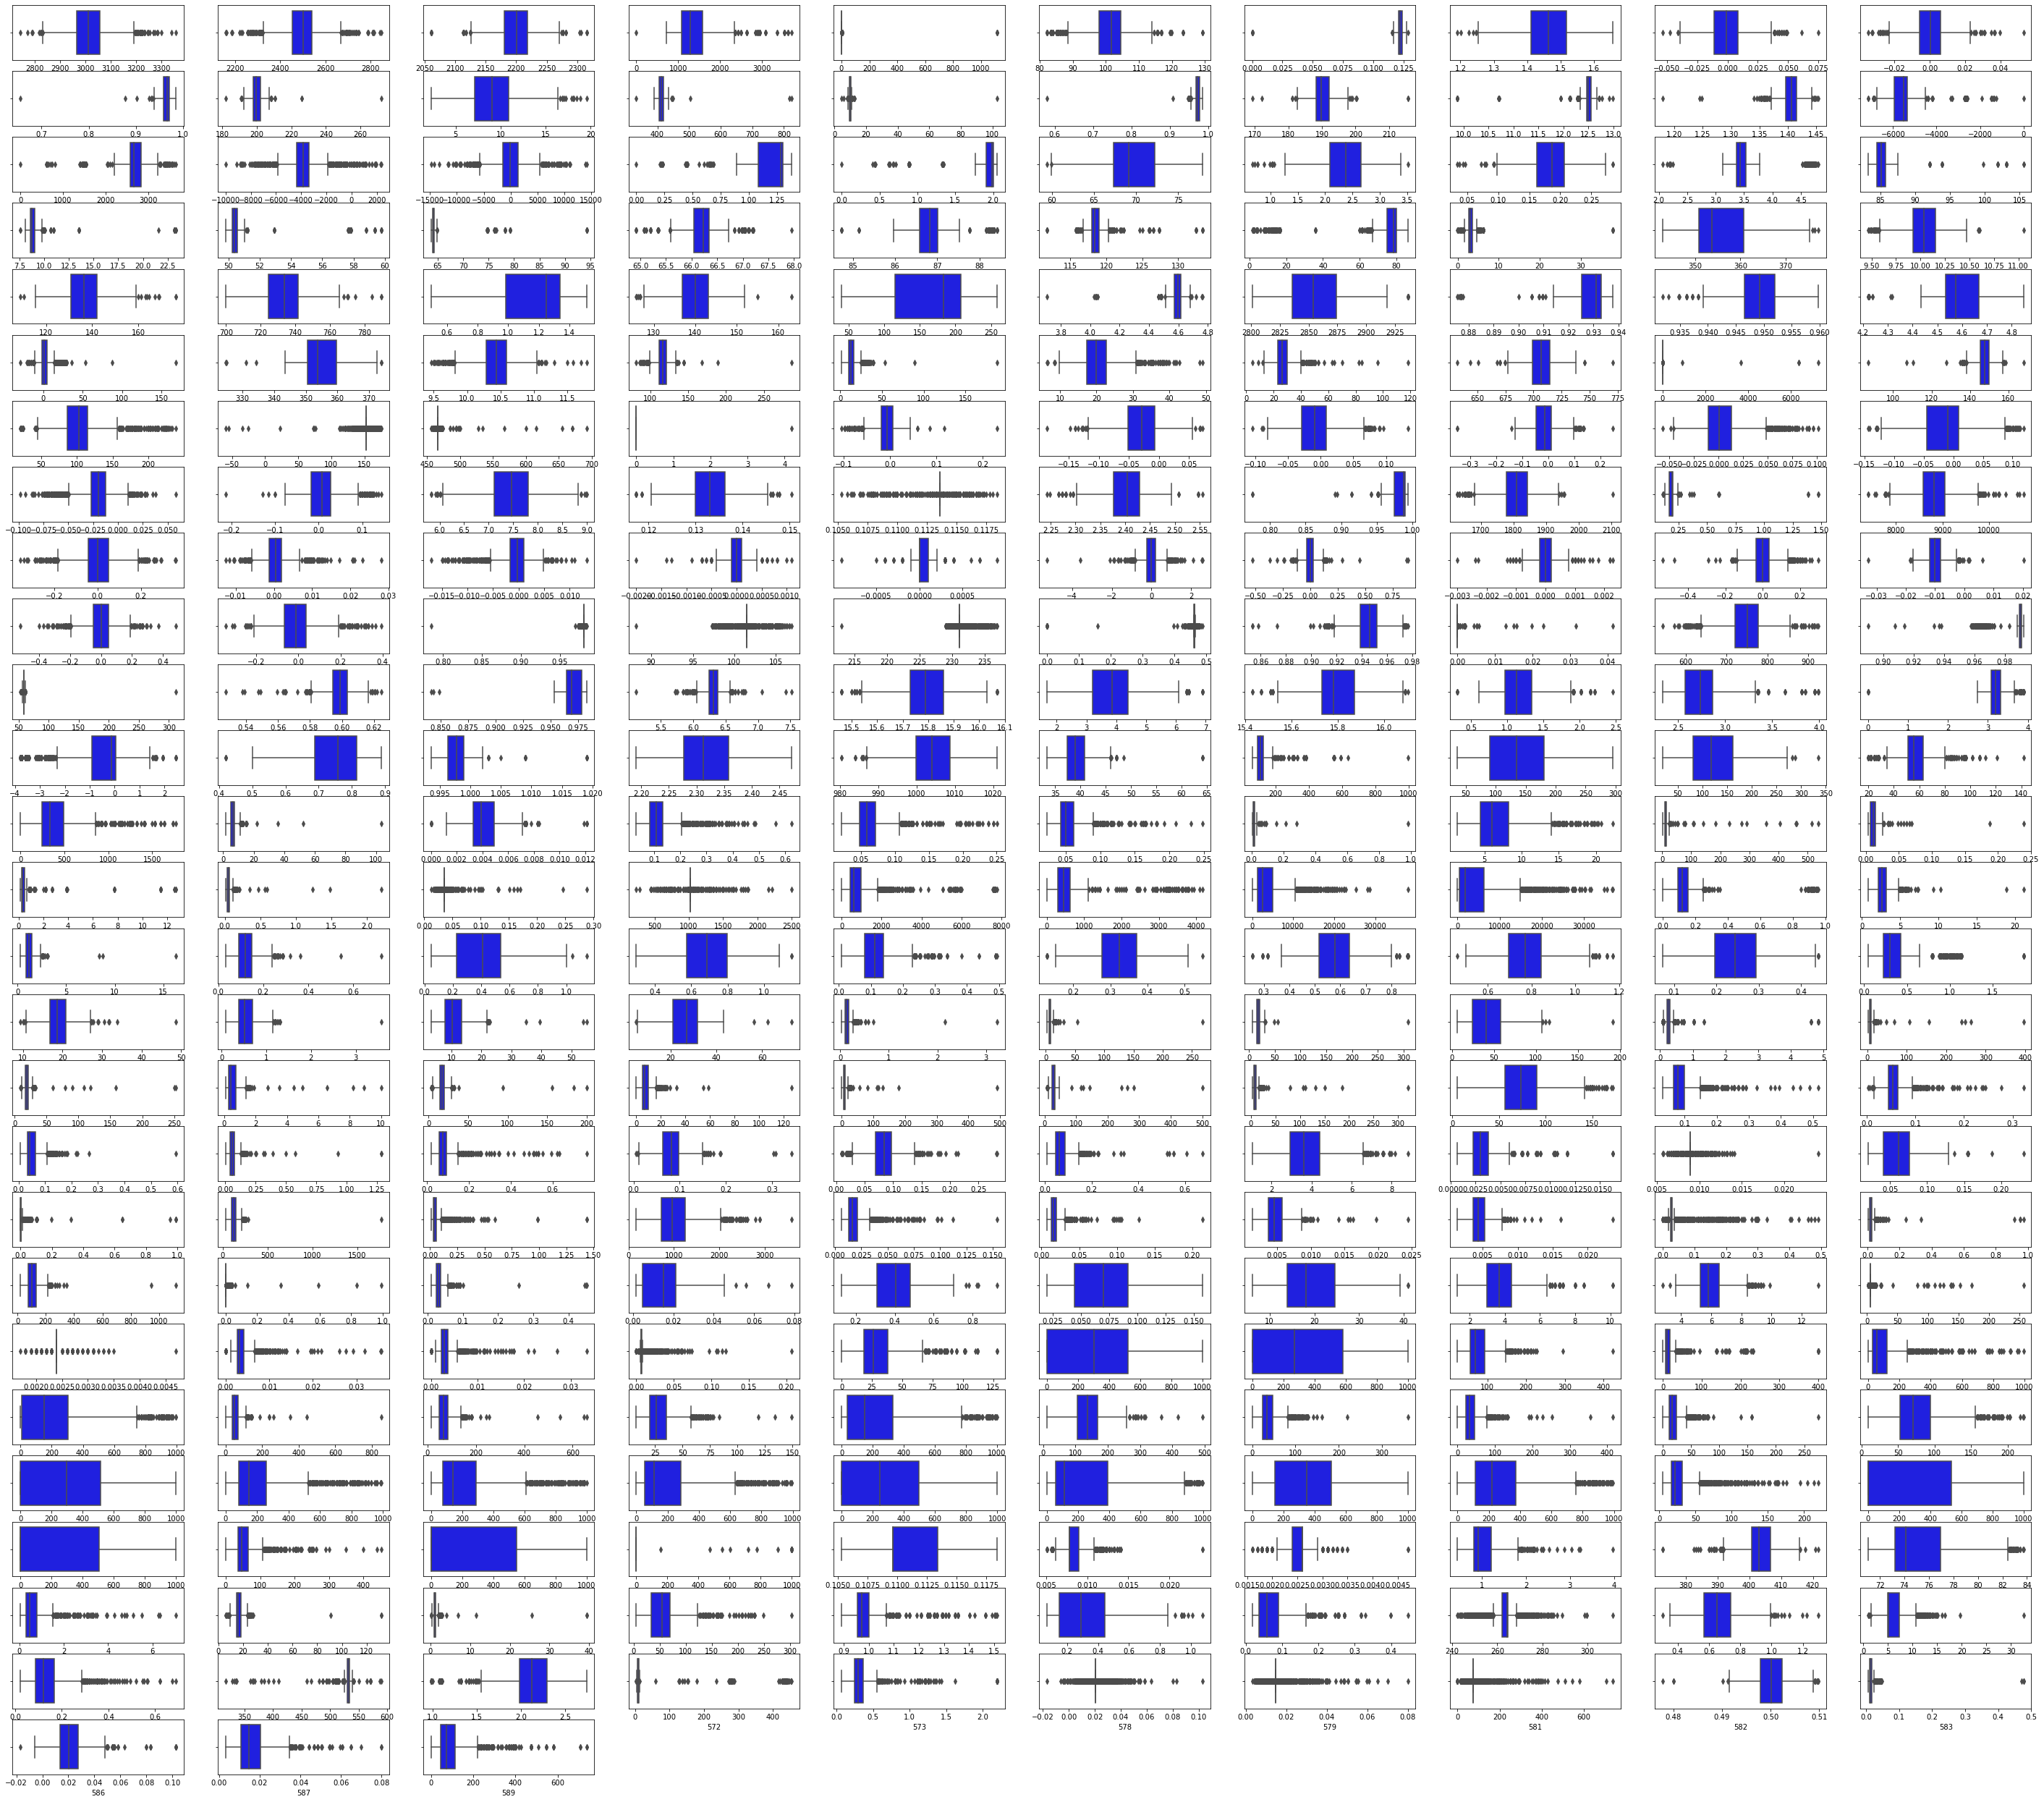

In [286]:
#Boxplot to check for outliers

plt.figure(figsize=(50, 50))
col = 1
for i in frame_combined.columns:
    plt.subplot(30,10, col)
    sns.boxplot(frame_combined[i],color='blue')
    col += 1


In [287]:
#find the outliers and replace them by median
for i in frame_combined.columns:
    q1 = frame_combined[i].quantile(0.25)
    q3 = frame_combined[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    frame_combined.loc[(frame_combined[i] < low) | (frame_combined[i] > high), i] = frame_combined[i].median()


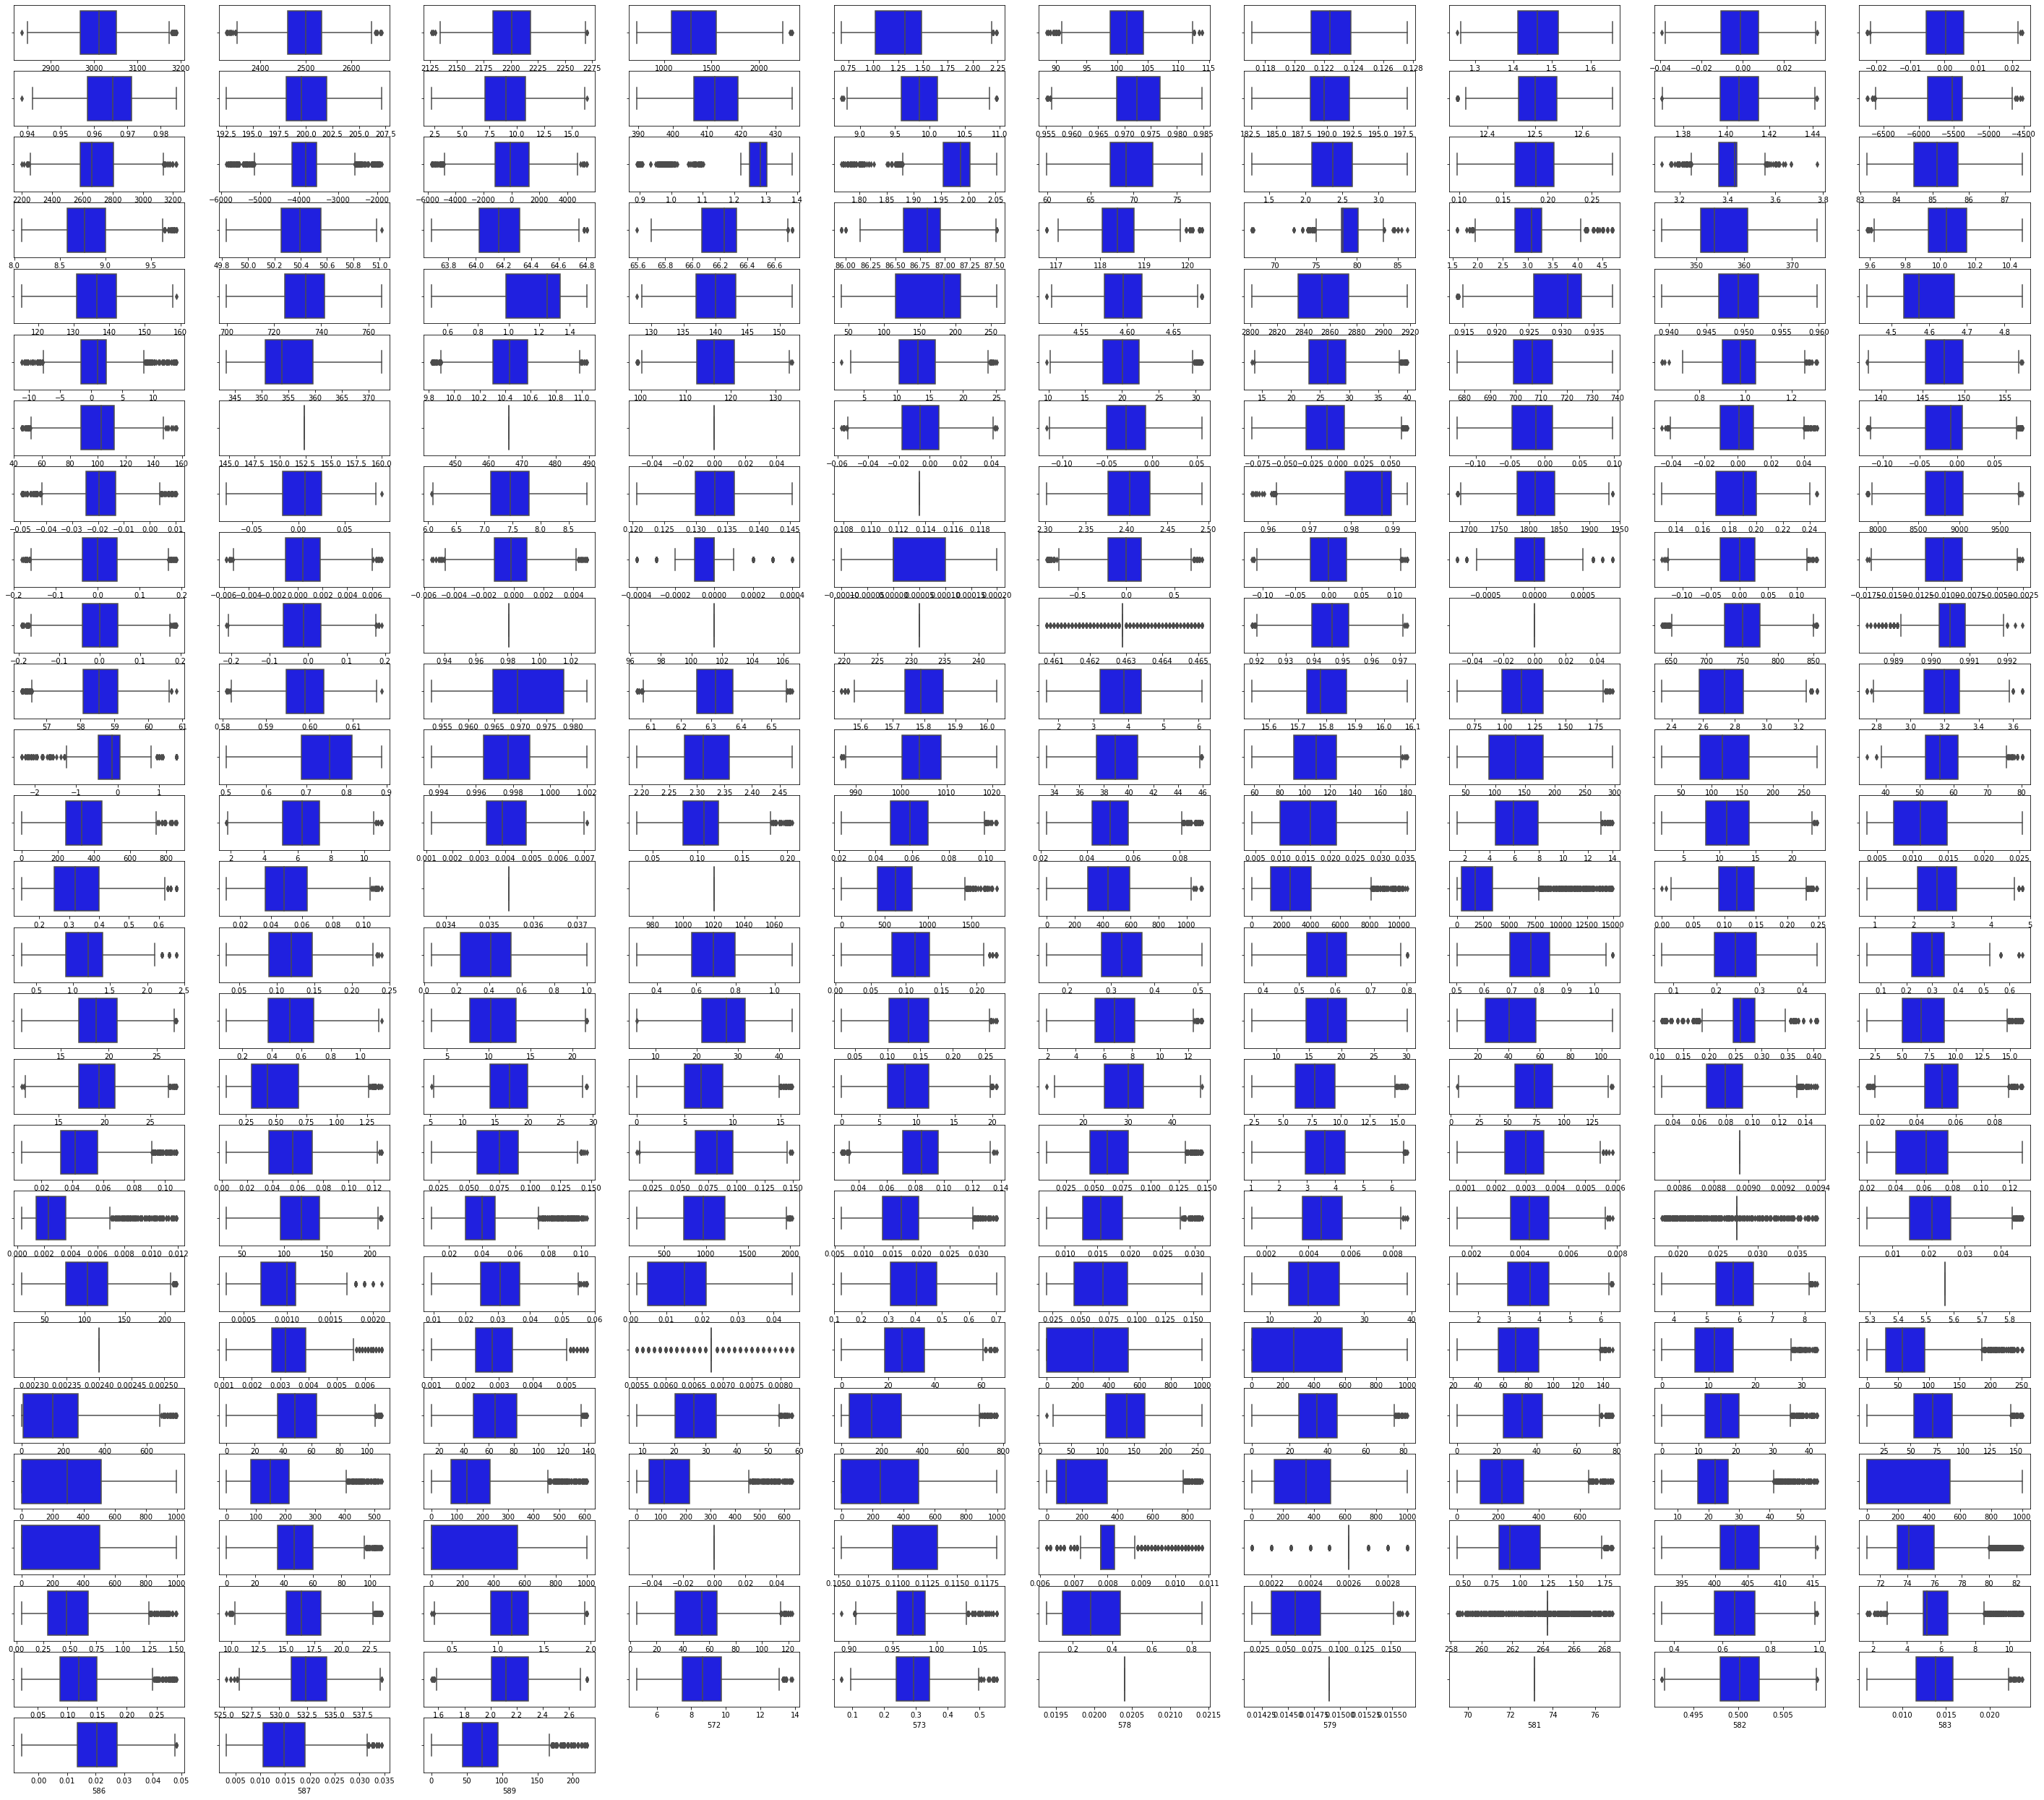

In [288]:
#After treating the outlier values

plt.figure(figsize=(50, 50))
col = 1
for i in frame_combined.columns:
    plt.subplot(30,10, col)
    sns.boxplot(frame_combined[i],color='blue')
    col += 1


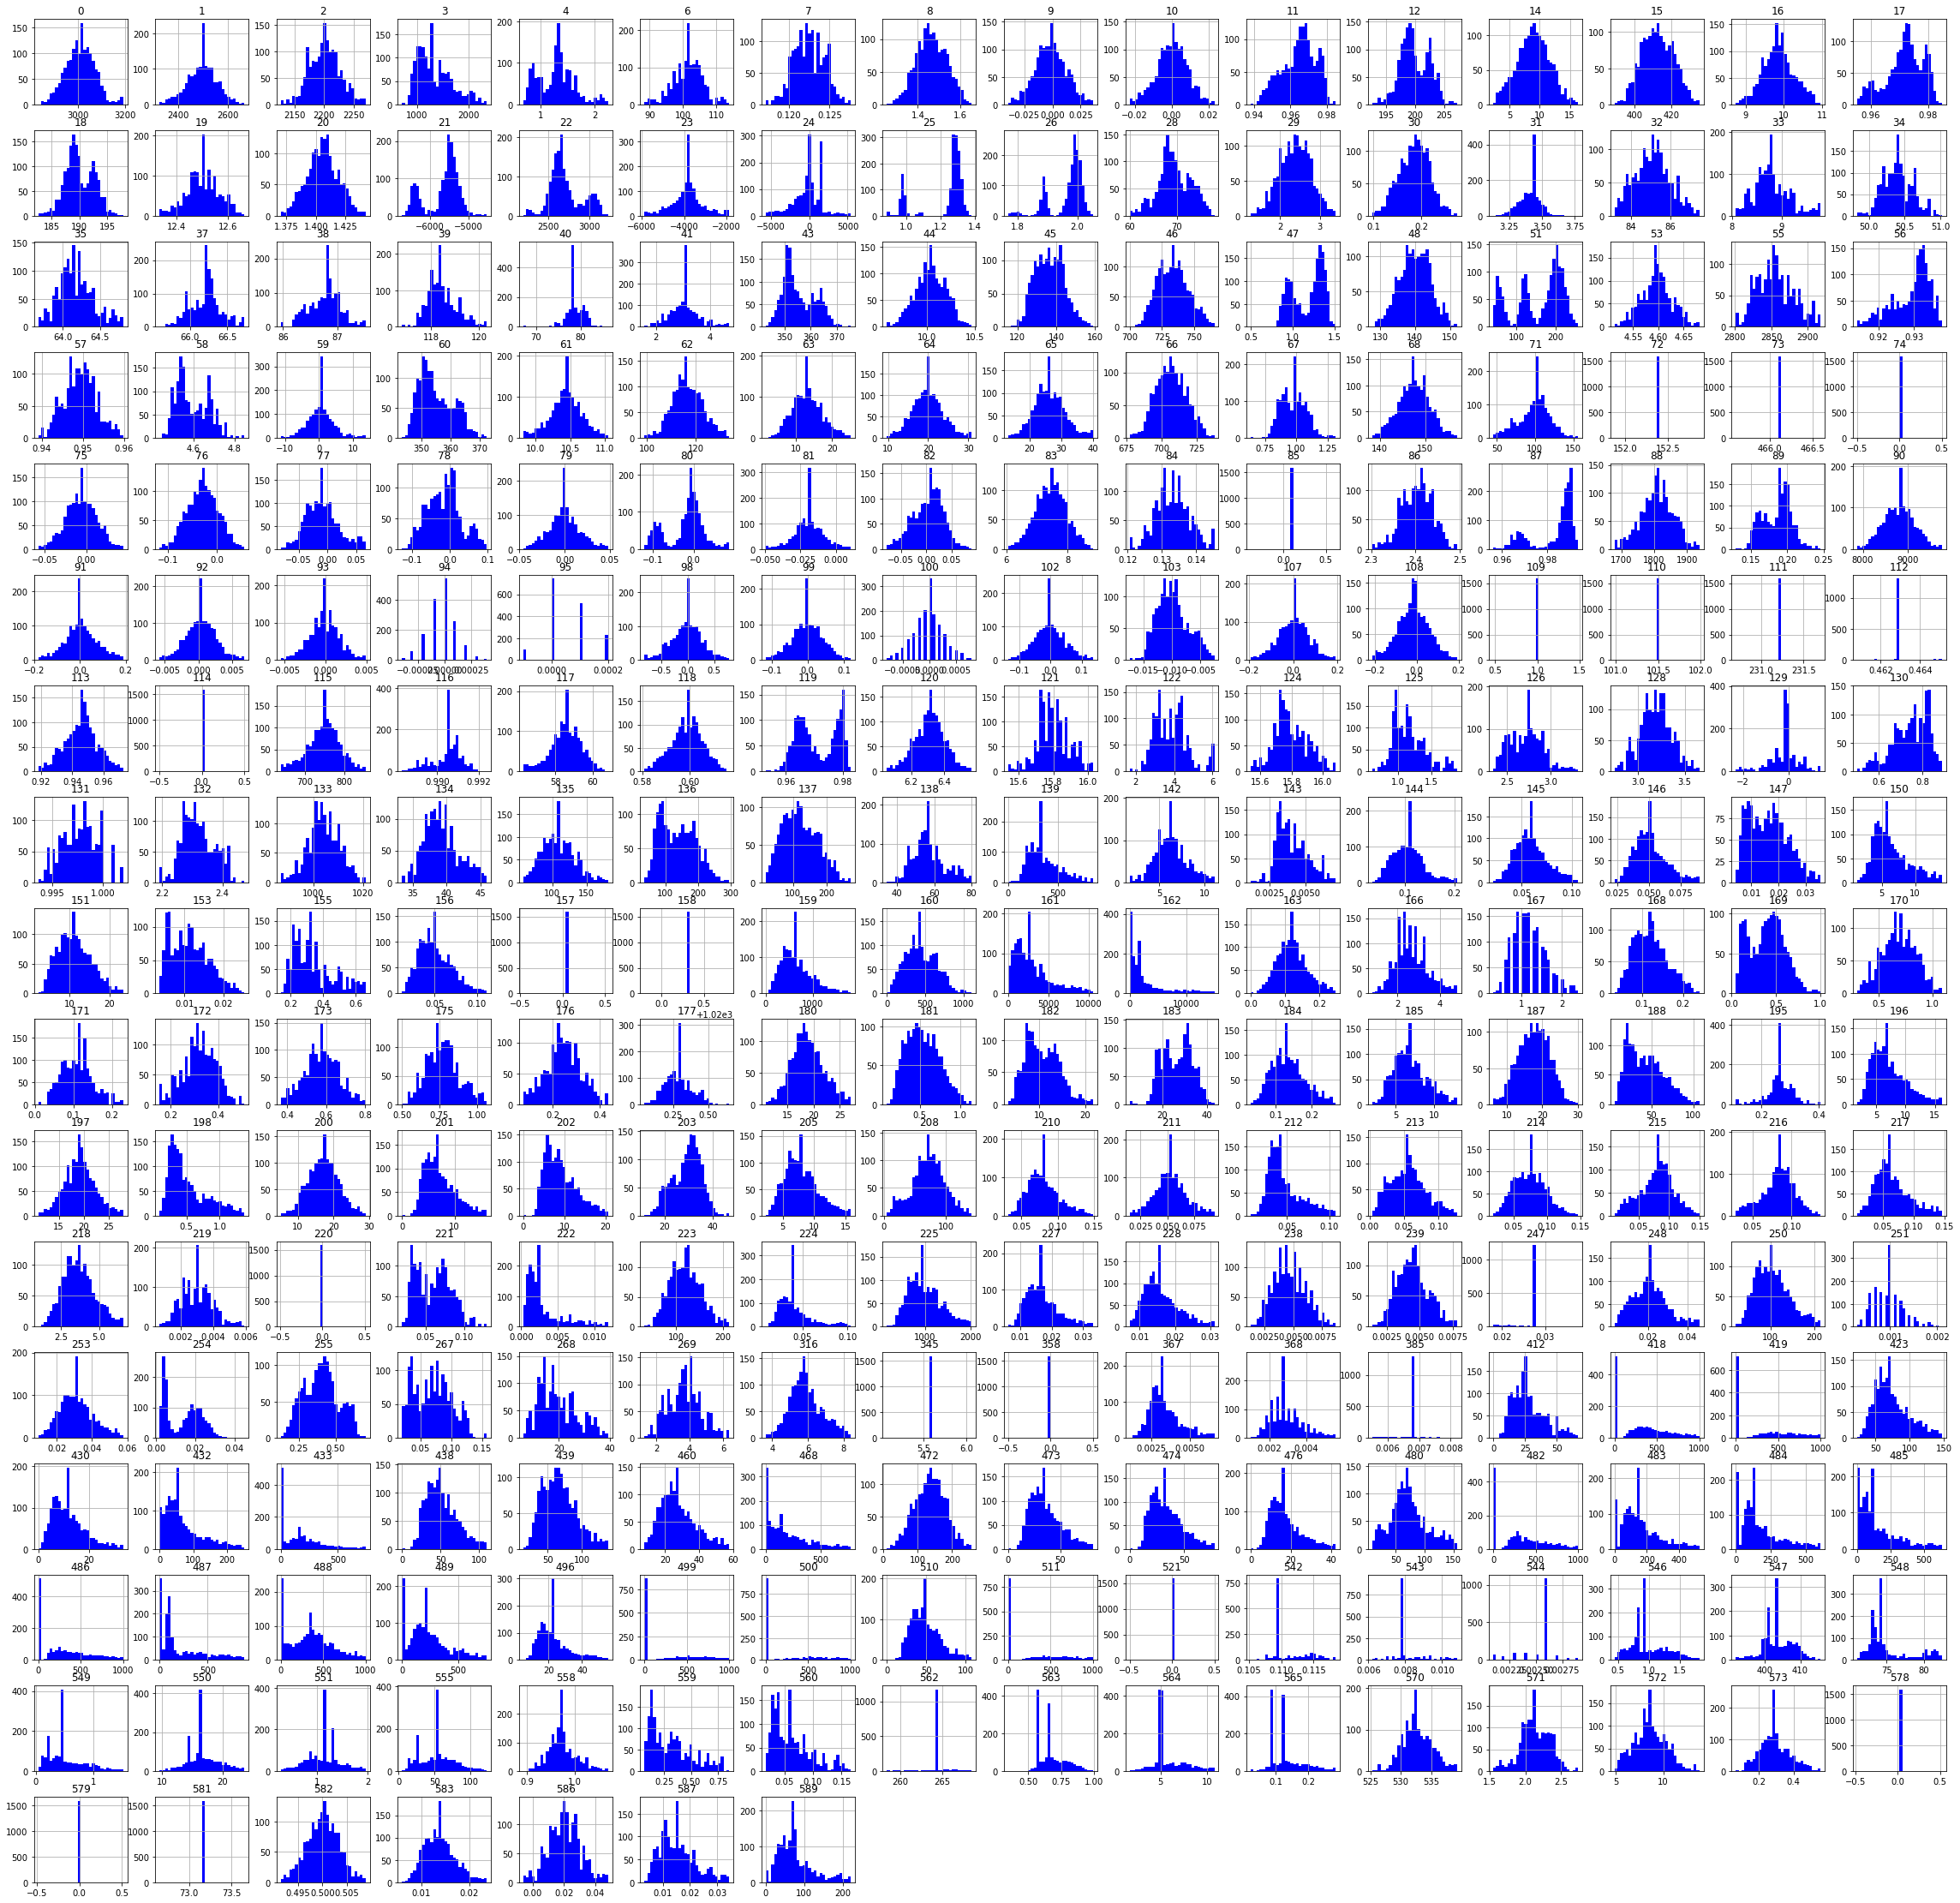

In [289]:
#plotting histogram to check for the frequency of values within a variable
frame_combined.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()


In [290]:
#Some variables have still have 0 as a constant signal, will be dropping them after scaling


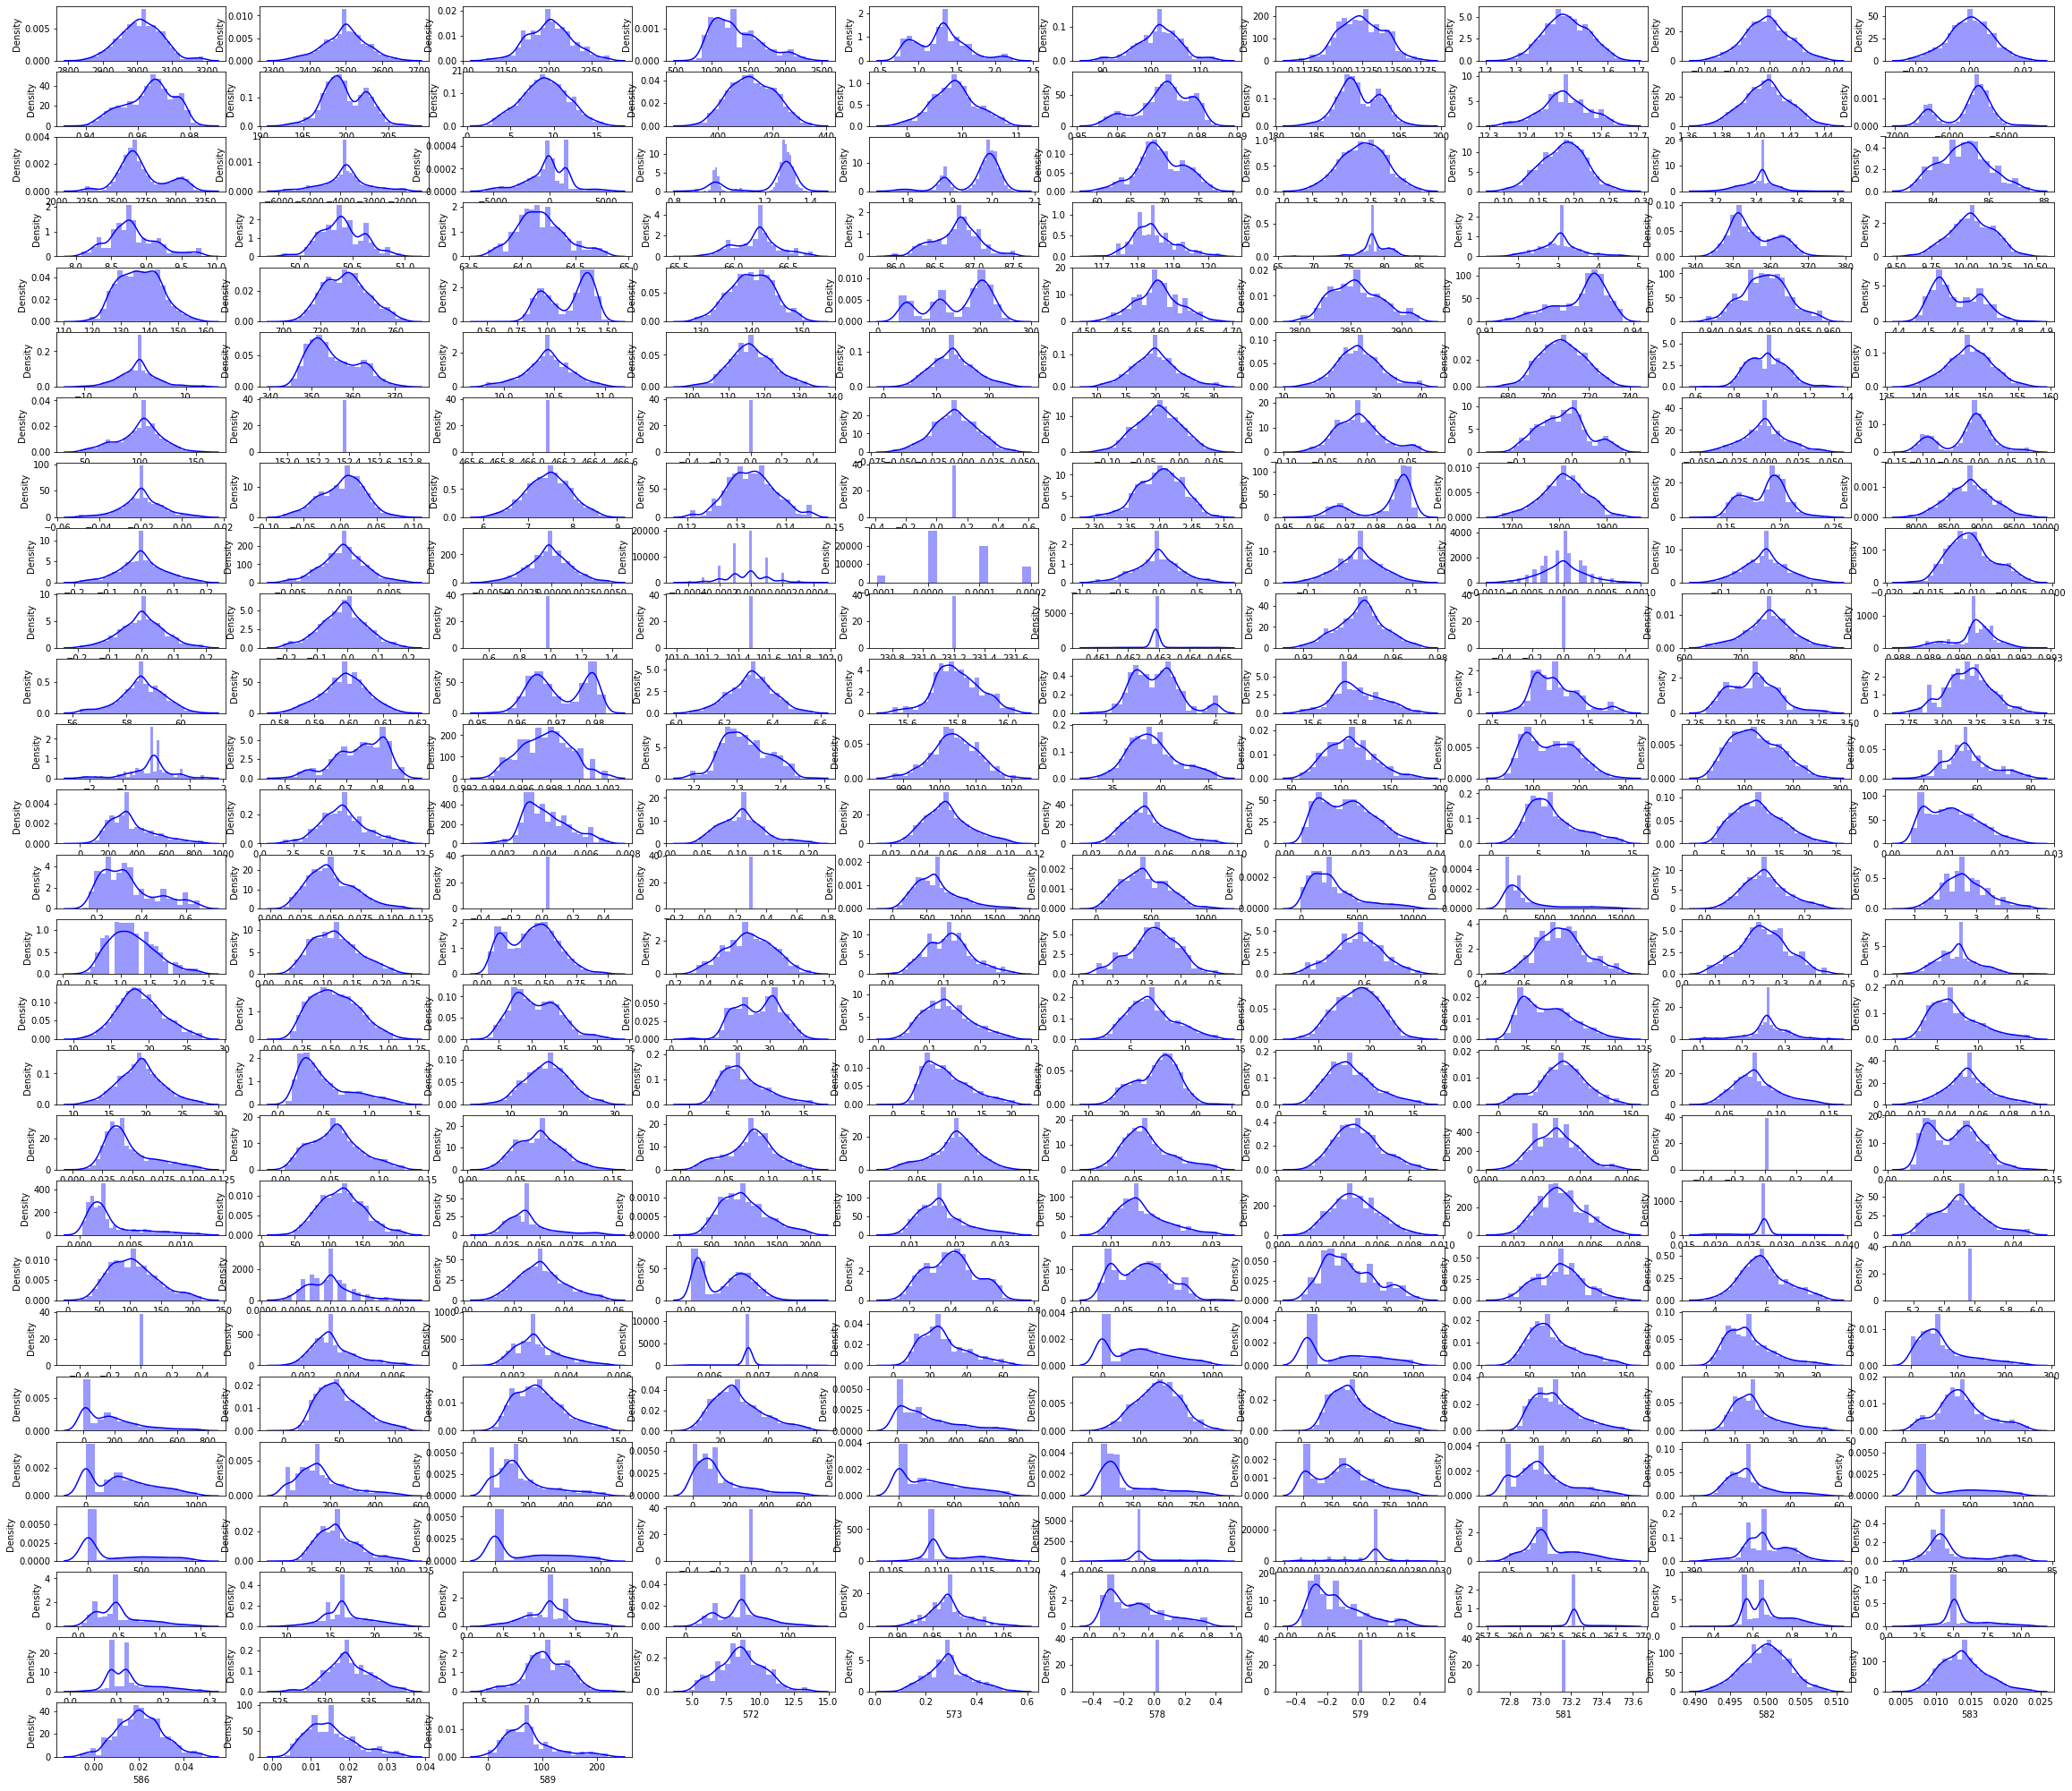

In [291]:
#density plot to check for the distribution of the variables
#multivariate analysis
plt.figure(figsize=(40, 40))
col = 1
for i in frame_combined.columns:
    plt.subplot(30, 10, col)
    sns.distplot(frame_combined[i], color = 'b')
    col += 1 


In [292]:
#Majority of the variable seem to have a normal distribution

In [293]:
#scaling on dataset frame_combined with z-score
comScaled= frame_combined.apply(zscore)  
##multivariate analysis
comScaled.describe().T



,count,mean,std,min,25%,50%,75%,max
0,1585.0,-6.755935e-15,1.000316,-2.890233,-0.679691,0.026298,0.675120,2.941206
1,1585.0,2.311751e-15,1.000316,-2.865861,-0.626154,0.041325,0.628035,2.834158
2,1585.0,-6.713172e-16,1.000316,-2.891598,-0.695507,-0.007262,0.643941,2.674646
3,1585.0,-4.279787e-16,1.000316,-1.893428,-0.782218,-0.178264,0.625540,3.011307
4,1585.0,5.351485e-17,1.000316,-1.845401,-0.834939,0.064018,0.582173,2.853460
...,...,...,...,...,...,...,...,...
582,1585.0,3.185689e-14,1.000316,-2.650370,-0.643119,0.020818,0.684755,2.692006
583,1585.0,1.980890e-16,1.000316,-2.476380,-0.718543,-0.027964,0.599835,3.079641
586,1585.0,-2.525495e-16,1.000316,-2.616881,-0.697799,-0.008898,0.670162,2.736866
587,1585.0,1.567884e-16,1.000316,-1.862055,-0.731021,-0.089083,0.552856,2.921914


In [294]:
#replacing the NaN/NA with zero and considering it as no signal
comScaled.fillna(0,inplace=True)


In [295]:
past_data=comScaled.iloc[0:1567,:]
row,column=past_data.shape
print('The past dataset contains', row, 'rows and', column, 'columns')


The past dataset contains 1567 rows and 263 columns


In [296]:
future_data=comScaled.iloc[1567:1586,:]
row,column=future_data.shape
print('The validation dataset contains', row, 'rows and', column, 'columns')

The validation dataset contains 18 rows and 263 columns


In [297]:
past_data['Pass/Fail'] = pd.Series(df1.iloc[: , -1])
past_data.head()

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.342020,1.120710,-0.524093,0.204344,0.194459,-0.875369,0.926235,0.501794,1.261822,-0.425173,...,0.267559,0.0,1.0,-1.0,0.128900,-0.655763,-0.008898,-0.089083,-0.099245,-1
1,1.395239,-0.539340,1.130619,0.361756,-1.400882,0.195258,1.191395,0.447767,0.059482,-1.798413,...,-0.319951,0.0,1.0,-1.0,0.561232,2.640182,-1.081615,0.720983,2.905112,-1
2,-1.254780,1.052535,-0.575344,1.063979,0.645290,-1.356472,0.873203,-0.286457,0.390666,0.140987,...,-1.218702,0.0,1.0,-1.0,-1.322496,0.568445,-0.008898,-0.089083,0.138084,1
3,-0.343506,-0.291491,-0.086081,-1.297846,0.074838,0.623826,-0.399563,0.331399,-0.797275,-0.413127,...,-1.386562,0.0,1.0,-1.0,-0.334311,-1.126612,-0.038422,-0.073798,-0.060971,-1
4,0.363296,0.094220,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.537813,-0.127708,-0.882920,...,-0.820034,0.0,1.0,-1.0,0.020818,-0.027964,-0.038422,-0.073798,-0.060971,-1


In [298]:
#checking for distribution of the target class shows that the data set is highly imbalanced
#univariate,
past_data['Pass/Fail'].value_counts()


-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [299]:
#label encoding the target class
past_data['Pass/Fail']=past_data['Pass/Fail'].replace([-1,1],[0,1])
past_data.head()
past_data['Pass/Fail'].value_counts()


0    1463
1     104
Name: Pass/Fail, dtype: int64

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

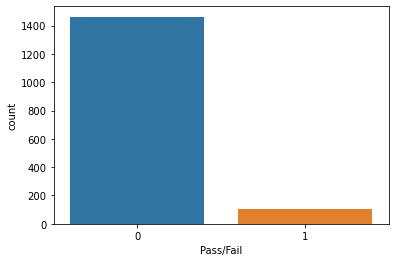

In [300]:
sns.countplot(past_data['Pass/Fail'])

In [301]:
#Segregate predictors vs target attributes
X = past_data.drop(['Pass/Fail'] , axis=1)

y = past_data['Pass/Fail']

In [302]:

  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1096, 263)
Number transactions y_train dataset:  (1096,)
Number transactions X_test dataset:  (471, 263)
Number transactions y_test dataset:  (471,)


In [303]:
#Now train the model without handling the imbalanced class distribution

lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train)

model_score = lr.score(X_test, y_test)
print(model_score)
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

0.8577494692144374
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       445
           1       0.08      0.15      0.11        26

    accuracy                           0.86       471
   macro avg       0.51      0.53      0.51       471
weighted avg       0.90      0.86      0.88       471

[[400  45]
 [ 22   4]]


In [304]:
#Train the model Using SMOTE(Synthetic Minority Oversampling Technique,) Algorithm
#SMOTE for oversampling imbalanced classification datasets.



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

sm = SMOTE(random_state = 2)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_SMOTE.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_SMOTE == 1)))
print("After OverSampling, counts of label '0': {}\n".format(sum(y_SMOTE == 0)))
print('original dataset shape',Counter(y_train))
print('Resample dataset shape:',Counter(y_SMOTE))

Before OverSampling, counts of label '1': 78
Before OverSampling, counts of label '0': 1018 

After OverSampling, the shape of train_X: (2036, 263)
After OverSampling, the shape of train_y: (2036,) 

After OverSampling, counts of label '1': 1018
After OverSampling, counts of label '0': 1018

original dataset shape Counter({0: 1018, 1: 78})
Resample dataset shape: Counter({0: 1018, 1: 1018})


In [305]:
lr1 = LogisticRegression()
lr1.fit(X_SMOTE, y_SMOTE)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       445
           1       0.08      0.23      0.12        26

    accuracy                           0.82       471
   macro avg       0.52      0.54      0.51       471
weighted avg       0.90      0.82      0.86       471

[[380  65]
 [ 20   6]]


In [306]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))


SMOTE Training Fail    : 1018 (50.00%)
SMOTE Training Pass  : 1018 (50.00%)


In [307]:
# Initializaing various classification algorithms with Smote dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='rbf')))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=25,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 94.052288% (1.310494%)
KNN: 68.557982% (0.587151%)
GNB: 87.182082% (2.276799%)
DT: 90.915753% (0.995113%)
RF: 99.554195% (0.348002%)
AB: 93.537821% (2.261777%)
GBT: 96.985791% (0.805669%)
SVM: 99.951220% (0.146341%)


In [308]:
#Random over Sampling



# Implementing random over sampling
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, y_train)



In [309]:
lr1 = LogisticRegression()
lr1.fit(X_over, y_over)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       445
           1       0.07      0.19      0.11        26

    accuracy                           0.82       471
   macro avg       0.51      0.52      0.50       471
weighted avg       0.90      0.82      0.86       471

[[381  64]
 [ 21   5]]


In [310]:


print("over sampling Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over sampling Training Pass  : {0} ({1:0.2f}%)\n".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))
print('original dataset shape:',Counter(y_train))
print('Resample dataset shape:',Counter(y_over))


over sampling Training Fail    : 509 (33.33%)
over sampling Training Pass  : 1018 (66.67%)

original dataset shape: Counter({0: 1018, 1: 78})
Resample dataset shape: Counter({0: 1018, 1: 509})


In [311]:
# Initializaing various classification algorithms with over sampled dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='rbf')))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=69,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)


LR: 89.174064% (2.595648%)
KNN: 81.478076% (3.666240%)
GNB: 66.185258% (4.348949%)
DT: 92.827614% (1.595306%)
RF: 100.000000% (0.000000%)
AB: 91.683339% (2.824074%)
GBT: 98.659236% (1.137609%)
SVM: 100.000000% (0.000000%)


In [312]:

# Implementing random under sampling
under= RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under= under.fit_resample(X_train, y_train)


In [313]:
lr1 = LogisticRegression()
lr1.fit(X_under, y_under)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       445
           1       0.10      0.54      0.17        26

    accuracy                           0.71       471
   macro avg       0.53      0.63      0.50       471
weighted avg       0.92      0.71      0.79       471

[[319 126]
 [ 12  14]]


In [314]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)\n".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))
print('original dataset shape:' ,Counter(y_train))
print('Resample dataset shape:' ,Counter(y_under))




Under Training Fail    : 78 (33.33%)
under Training Pass  : 156 (66.67%)

original dataset shape: Counter({0: 1018, 1: 78})
Resample dataset shape: Counter({0: 156, 1: 78})


In [315]:
# Initializaing various classification algorithms with random under sampler dataset and choosing the best model based on f1 score

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='rbf')))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=66,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)


LR: 49.450561% (10.857916%)
KNN: 39.150549% (16.614955%)
GNB: 48.196456% (13.108156%)
DT: 39.903753% (20.814029%)
RF: 15.777778% (16.761213%)
AB: 49.884292% (12.477376%)
GBT: 34.680375% (15.901450%)
SVM: 17.611111% (12.619919%)


In [316]:
#Gaussian Naive Bayes on Normal Dataset

In [317]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [318]:
modelnb_score = nb.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modelnb_score)


Accuracy Score of Training Data:  0.8321167883211679


In [319]:


y_predictnb= nb.predict(X_test)
modelnb_score = accuracy_score(y_test, y_predictnb)
print('Accuracy Score of Test Data:', modelnb_score)


Accuracy Score of Test Data: 0.7961783439490446


In [320]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictnb, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.11      0.38      0.17        26
           0       0.96      0.82      0.88       445

    accuracy                           0.80       471
   macro avg       0.53      0.60      0.53       471
weighted avg       0.91      0.80      0.84       471



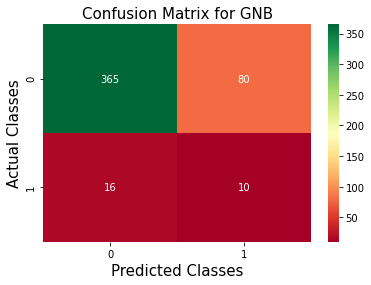

In [321]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictnb)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Predicted Classes', fontsize = 15)
plt.ylabel('Actual Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);


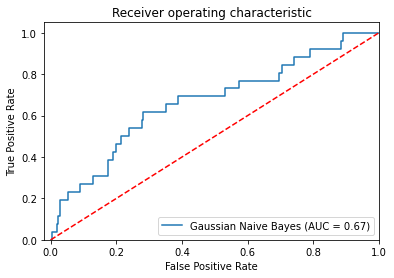

In [322]:
#Plotting ROC and AUC
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [323]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])


         fpr       tpr     1-fpr        tf  threshold
30  0.350562  0.653846  0.649438  0.004408   0.006285


In [324]:
# store the predicted probabilities for Failed Class. 
y_pred_prob = nb.predict_proba(X_test)[:, 1]
# predicted probability is greater than 0.006285
y_pred_class = binarize([y_pred_prob], 0.006285)[0]


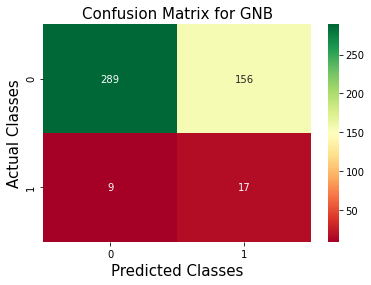

In [325]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB', fontsize = 15);


In [326]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_class, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.10      0.65      0.17        26
           0       0.97      0.65      0.78       445

    accuracy                           0.65       471
   macro avg       0.53      0.65      0.47       471
weighted avg       0.92      0.65      0.74       471



In [327]:


precision_nb, recall_nb, f1_score_nb, support = precision_recall_fscore_support(y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nb)
print('Recall Score :', '%0.2f' % recall_nb)
print('F1-Score:', '%0.2f' % f1_score_nb)
nb_acc= accuracy_score(y_test, y_predictnb)
print('Accuracy Score :','%0.2f' % nb_acc)
print('AUC :','%0.2f' % roc_auc_nb)
print('Thresholdnb :','%0.2f' % 0.006285)
Thresholdnb=0.006285


Precision Score : 0.53
Recall Score : 0.65
F1-Score: 0.47
Accuracy Score : 0.80
AUC : 0.67
Thresholdnb : 0.01


In [328]:
#Gaussian Naive Bayes on Under sampled Data


In [329]:
nbu = GaussianNB()
nbu.fit(X_under, y_under)



GaussianNB()

In [330]:
modelnbu_score = nbu.score(X_under,y_under)
print('Accuracy Score of Training Data: ', modelnbu_score)


Accuracy Score of Training Data:  0.782051282051282


In [331]:
y_predictnbu= nbu.predict(X_test)
modelnbu_score = accuracy_score(y_test, y_predictnbu)
print('Accuracy Score of Test Data:', modelnbu_score)


Accuracy Score of Test Data: 0.6709129511677282


In [332]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictnbu, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.09      0.58      0.16        26
           0       0.96      0.68      0.80       445

    accuracy                           0.67       471
   macro avg       0.53      0.63      0.48       471
weighted avg       0.92      0.67      0.76       471



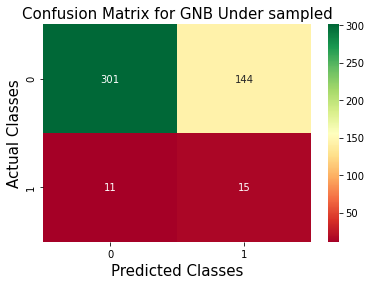

In [333]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictnbu)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);


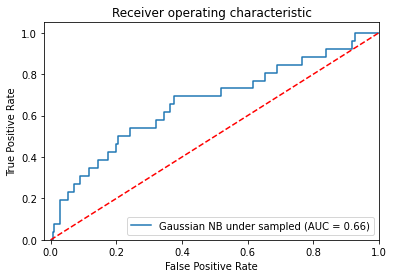

In [334]:
#Plotting ROC and AUC
probs = nbu.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_nbu = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian NB under sampled (AUC = %0.2f)' % roc_auc_nbu)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [335]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])


         fpr       tpr     1-fpr        tf  threshold
31  0.364045  0.653846  0.635955  0.017891   0.260172


In [336]:
# store the predicted probabilities for failed class 
y_pred_prob = nbu.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.260172
y_pred_class = binarize([y_pred_prob], 0.260172)[0]


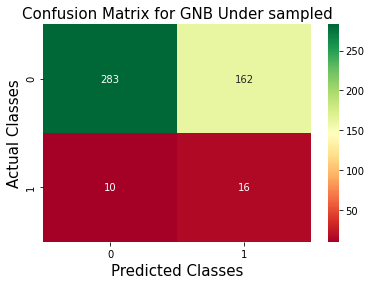

In [337]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for GNB Under sampled', fontsize = 15);


In [339]:
precision_nbu, recall_nbu, f1_score_nbu, support = precision_recall_fscore_support(y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nbu)
print('Recall Score :', '%0.2f' % recall_nbu)
print('F1-Score:', '%0.2f' % f1_score_nbu)
nbu_acc= accuracy_score(y_test, y_predictnbu)
print('Accuracy Score :','%0.2f' % nbu_acc)
print('AUC :','%0.2f' % roc_auc_nbu)
print('Thresholdnbu:','%0.2f' %0.260172)
Thresholdnbu=0.260172


Precision Score : 0.53
Recall Score : 0.63
F1-Score: 0.46
Accuracy Score : 0.67
AUC : 0.66
Thresholdnbu: 0.26


In [340]:
# Best RandomForest model on Random over sampled Dataset

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}


In [341]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_over, y_over)
rf_random.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 463,
 'min_samples_split': 82,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': False}

In [342]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_over, y_over)


RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_split=82, n_estimators=463)

In [343]:
modelrfg1_score=rf_grid1.score(X_over,y_over)
print('Accuracy Score of Training Data: ', modelrfg1_score)


Accuracy Score of Training Data:  1.0


In [344]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)


Accuracy Score of Test Data: 0.9447983014861996


In [345]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_predictrfg1, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           0       0.94      1.00      0.97       445

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.49       471
weighted avg       0.89      0.94      0.92       471



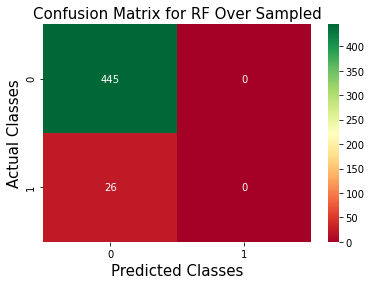

In [346]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF Over Sampled', fontsize = 15);


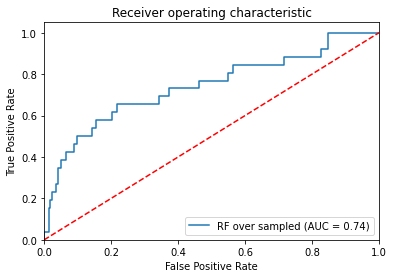

In [347]:
#Plotting ROC and AUC
probs = rf_grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [348]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])


        fpr       tpr    1-fpr        tf  threshold
30  0.34382  0.653846  0.65618 -0.002334   0.160965


In [349]:
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.160965
y_pred_class = binarize([y_pred_prob], 0.160965)[0]


In [350]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_class, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.10      0.65      0.17        26
           0       0.97      0.66      0.78       445

    accuracy                           0.66       471
   macro avg       0.54      0.66      0.48       471
weighted avg       0.92      0.66      0.75       471



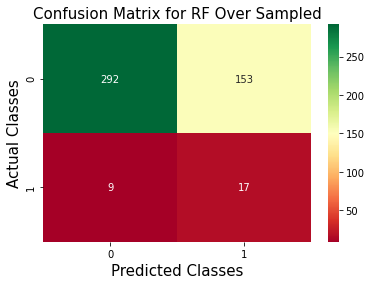

In [351]:
# visualizing confusion matrix
cm= confusion_matrix(y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF Over Sampled', fontsize = 15);


In [352]:
precision_rfo, recall_rfo, f1_score_rfo, support = precision_recall_fscore_support(y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rfo)
print('Recall Score :', '%0.2f' % recall_rfo)
print('F1-Score:', '%0.2f' % f1_score_rfo)
rfo_acc= accuracy_score(y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % rfo_acc)
print('AUC :','%0.2f' % roc_auc_rfo)
print('Thresholdrf :','%0.2f' % 0.160965)
Thresholdrf=0.160965


Precision Score : 0.54
Recall Score : 0.66
F1-Score: 0.48
Accuracy Score : 0.66
AUC : 0.74
Thresholdrf : 0.16


In [353]:
modellists = []
modellists.append(['Gaussian NB Normal Data', nb_acc * 100, recall_nb * 100, precision_nb * 100,roc_auc_nb*100,f1_score_nb*100,Thresholdnb])
modellists.append(['Gausian NB under samples data', nbu_acc* 100, recall_nbu * 100, precision_nbu* 100,roc_auc_nbu*100,f1_score_nbu*100,Thresholdnbu])
modellists.append(['Random Forest Over sampled Data', rfo_acc * 100, recall_rfo * 100, precision_rfo * 100,roc_auc_rfo*100,f1_score_rfo*100,Thresholdrf])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Scores on Test', 'Recall Score', 'Precision Score','AUC','F1 Score','Threshold'])
model_df


,Model,Accuracy Scores on Test,Recall Score,Precision Score,AUC,F1 Score,Threshold
0,Gaussian NB Normal Data,79.617834,65.164218,53.403228,66.663786,47.439080,0.006285
1,Gausian NB under samples data,67.091295,62.566984,52.787897,66.456353,46.190021,0.260172
2,Random Forest Over sampled Data,65.605096,65.501296,53.504983,74.001729,47.815561,0.160965


In [178]:
# GridSearchCV
#GridSearchCV can take a lot computational wise since it has to train your model for each combination,
#often including cross validation. So for each combination it would train on k folds.
#This can often explode your computation time tremendously.So GridSearchCV not used here.

In [179]:
#AUC is 74 hence Random Forest Over sampled Data is best model.Greater is the AUC better is the prediction of the model.


In [370]:
#Fitting the results on the validation/future dataset

#Pickle the selected model for future use.
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf_grid1, open(filename, 'wb'))



val1=future_data.copy()
val1=val1.reset_index(drop=True)
val1=pd.DataFrame(val1)

val2=future_data.copy()
val2=val2.reset_index(drop=True)
val2=pd.DataFrame(val2)

val3=future_data.copy()
val3=val3.reset_index(drop=True)
val3=pd.DataFrame(val3)

val4=future_data.copy()
val4=val4.reset_index(drop=True)
val4=pd.DataFrame(val4)


In [371]:
#Fitting Random forest

#Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.fit(X_over, y_over)
pred=loaded_model.predict(val1)
val1['Pass/Fail'] = pred
val1.head(18)


,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.342020,1.120710,-0.524093,0.204344,0.194459,-0.875369,0.926235,0.501794,1.261822,-0.425173,...,0.267559,0.0,1.0,-1.0,0.128900,-0.655763,-0.008898,-0.089083,-0.099245,0
1,1.395239,-0.539340,1.130619,0.361756,-1.400882,0.195258,1.191395,0.447767,0.059482,-1.798413,...,-0.319951,0.0,1.0,-1.0,0.561232,2.640182,-1.081615,0.720983,2.905112,0
2,-1.254780,1.052535,-0.575344,1.063979,0.645290,-1.356472,0.873203,-0.286457,0.390666,0.140987,...,-1.218702,0.0,1.0,-1.0,-1.322496,0.568445,-0.008898,-0.089083,0.138084,0
3,-0.343506,-0.291491,-0.086081,-1.297846,0.074838,0.623826,-0.399563,0.331399,-0.797275,-0.413127,...,-1.386562,0.0,1.0,-1.0,-0.334311,-1.126612,-0.038422,-0.073798,-0.060971,0
4,0.363296,0.094220,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.537813,-0.127708,-0.882920,...,-0.820034,0.0,1.0,-1.0,0.020818,-0.027964,-0.038422,-0.073798,-0.060971,0
5,-1.033255,-1.081719,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.892457,1.297820,0.646918,...,0.318850,0.0,1.0,-1.0,-1.600424,1.572924,1.339381,-0.043230,-0.719602,0
6,0.331301,-1.127393,1.130619,0.361756,-1.400882,0.195258,1.191395,1.625294,-1.848423,1.249216,...,-1.049676,0.0,1.0,-1.0,0.283304,0.128986,1.339381,-0.043230,-0.719602,0
7,0.795952,0.041325,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.706823,1.225824,0.068711,...,0.714020,0.0,1.0,-1.0,-0.519596,-1.032442,-0.018739,0.613993,0.406759,0
8,-0.685213,1.733112,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.990815,0.894641,-0.810644,...,0.280382,0.0,1.0,-1.0,-0.241669,1.039294,-0.933994,-0.455905,0.773686,0
9,0.101331,-1.156779,1.846857,-1.014159,-1.524109,1.077270,-2.096585,1.022677,1.240223,0.574642,...,-1.458835,0.0,1.0,-1.0,-1.044569,0.411495,0.059992,0.568140,0.300762,0


In [372]:
#fitting Random Forest with threshold
# store the predicted probabilities  for failed class 
y_pred_prob = loaded_model.predict_proba(val2)[:, 1]
# predict fail if the predicted probability is greater than 0.160965
pred = binarize([y_pred_prob],0.160965)[0]
val2['Pass/Fail'] = pred
val2.head(18)


,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.342020,1.120710,-0.524093,0.204344,0.194459,-0.875369,0.926235,0.501794,1.261822,-0.425173,...,0.267559,0.0,1.0,-1.0,0.128900,-0.655763,-0.008898,-0.089083,-0.099245,0.0
1,1.395239,-0.539340,1.130619,0.361756,-1.400882,0.195258,1.191395,0.447767,0.059482,-1.798413,...,-0.319951,0.0,1.0,-1.0,0.561232,2.640182,-1.081615,0.720983,2.905112,1.0
2,-1.254780,1.052535,-0.575344,1.063979,0.645290,-1.356472,0.873203,-0.286457,0.390666,0.140987,...,-1.218702,0.0,1.0,-1.0,-1.322496,0.568445,-0.008898,-0.089083,0.138084,1.0
3,-0.343506,-0.291491,-0.086081,-1.297846,0.074838,0.623826,-0.399563,0.331399,-0.797275,-0.413127,...,-1.386562,0.0,1.0,-1.0,-0.334311,-1.126612,-0.038422,-0.073798,-0.060971,0.0
4,0.363296,0.094220,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.537813,-0.127708,-0.882920,...,-0.820034,0.0,1.0,-1.0,0.020818,-0.027964,-0.038422,-0.073798,-0.060971,1.0
5,-1.033255,-1.081719,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.892457,1.297820,0.646918,...,0.318850,0.0,1.0,-1.0,-1.600424,1.572924,1.339381,-0.043230,-0.719602,1.0
6,0.331301,-1.127393,1.130619,0.361756,-1.400882,0.195258,1.191395,1.625294,-1.848423,1.249216,...,-1.049676,0.0,1.0,-1.0,0.283304,0.128986,1.339381,-0.043230,-0.719602,0.0
7,0.795952,0.041325,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.706823,1.225824,0.068711,...,0.714020,0.0,1.0,-1.0,-0.519596,-1.032442,-0.018739,0.613993,0.406759,1.0
8,-0.685213,1.733112,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.990815,0.894641,-0.810644,...,0.280382,0.0,1.0,-1.0,-0.241669,1.039294,-0.933994,-0.455905,0.773686,1.0
9,0.101331,-1.156779,1.846857,-1.014159,-1.524109,1.077270,-2.096585,1.022677,1.240223,0.574642,...,-1.458835,0.0,1.0,-1.0,-1.044569,0.411495,0.059992,0.568140,0.300762,1.0


In [373]:
#fiiting naive bayes on validation dataset
nb = GaussianNB()
nb.fit(X_train, y_train)
pred=nb.predict(val3)
val3['Pass/Fail'] = pred
val3.head(18)


,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.342020,1.120710,-0.524093,0.204344,0.194459,-0.875369,0.926235,0.501794,1.261822,-0.425173,...,0.267559,0.0,1.0,-1.0,0.128900,-0.655763,-0.008898,-0.089083,-0.099245,0
1,1.395239,-0.539340,1.130619,0.361756,-1.400882,0.195258,1.191395,0.447767,0.059482,-1.798413,...,-0.319951,0.0,1.0,-1.0,0.561232,2.640182,-1.081615,0.720983,2.905112,0
2,-1.254780,1.052535,-0.575344,1.063979,0.645290,-1.356472,0.873203,-0.286457,0.390666,0.140987,...,-1.218702,0.0,1.0,-1.0,-1.322496,0.568445,-0.008898,-0.089083,0.138084,0
3,-0.343506,-0.291491,-0.086081,-1.297846,0.074838,0.623826,-0.399563,0.331399,-0.797275,-0.413127,...,-1.386562,0.0,1.0,-1.0,-0.334311,-1.126612,-0.038422,-0.073798,-0.060971,0
4,0.363296,0.094220,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.537813,-0.127708,-0.882920,...,-0.820034,0.0,1.0,-1.0,0.020818,-0.027964,-0.038422,-0.073798,-0.060971,1
5,-1.033255,-1.081719,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.892457,1.297820,0.646918,...,0.318850,0.0,1.0,-1.0,-1.600424,1.572924,1.339381,-0.043230,-0.719602,1
6,0.331301,-1.127393,1.130619,0.361756,-1.400882,0.195258,1.191395,1.625294,-1.848423,1.249216,...,-1.049676,0.0,1.0,-1.0,0.283304,0.128986,1.339381,-0.043230,-0.719602,0
7,0.795952,0.041325,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.706823,1.225824,0.068711,...,0.714020,0.0,1.0,-1.0,-0.519596,-1.032442,-0.018739,0.613993,0.406759,1
8,-0.685213,1.733112,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.990815,0.894641,-0.810644,...,0.280382,0.0,1.0,-1.0,-0.241669,1.039294,-0.933994,-0.455905,0.773686,1
9,0.101331,-1.156779,1.846857,-1.014159,-1.524109,1.077270,-2.096585,1.022677,1.240223,0.574642,...,-1.458835,0.0,1.0,-1.0,-1.044569,0.411495,0.059992,0.568140,0.300762,0


In [374]:
#fitting naive bayes with threshold
# store the predicted probabilities  for failed class 
y_pred_prob = nb.predict_proba(val4)[:, 1]
# predict fail if the predicted probability is greater than 0.260172
pred = binarize([y_pred_prob], 0.260172)[0]
val4['Pass/Fail'] = pred
val4.head(18)


,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.342020,1.120710,-0.524093,0.204344,0.194459,-0.875369,0.926235,0.501794,1.261822,-0.425173,...,0.267559,0.0,1.0,-1.0,0.128900,-0.655763,-0.008898,-0.089083,-0.099245,0.0
1,1.395239,-0.539340,1.130619,0.361756,-1.400882,0.195258,1.191395,0.447767,0.059482,-1.798413,...,-0.319951,0.0,1.0,-1.0,0.561232,2.640182,-1.081615,0.720983,2.905112,0.0
2,-1.254780,1.052535,-0.575344,1.063979,0.645290,-1.356472,0.873203,-0.286457,0.390666,0.140987,...,-1.218702,0.0,1.0,-1.0,-1.322496,0.568445,-0.008898,-0.089083,0.138084,0.0
3,-0.343506,-0.291491,-0.086081,-1.297846,0.074838,0.623826,-0.399563,0.331399,-0.797275,-0.413127,...,-1.386562,0.0,1.0,-1.0,-0.334311,-1.126612,-0.038422,-0.073798,-0.060971,0.0
4,0.363296,0.094220,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.537813,-0.127708,-0.882920,...,-0.820034,0.0,1.0,-1.0,0.020818,-0.027964,-0.038422,-0.073798,-0.060971,1.0
5,-1.033255,-1.081719,1.244754,-0.049170,0.715018,-0.245351,0.555012,0.892457,1.297820,0.646918,...,0.318850,0.0,1.0,-1.0,-1.600424,1.572924,1.339381,-0.043230,-0.719602,1.0
6,0.331301,-1.127393,1.130619,0.361756,-1.400882,0.195258,1.191395,1.625294,-1.848423,1.249216,...,-1.049676,0.0,1.0,-1.0,0.283304,0.128986,1.339381,-0.043230,-0.719602,0.0
7,0.795952,0.041325,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.706823,1.225824,0.068711,...,0.714020,0.0,1.0,-1.0,-0.519596,-1.032442,-0.018739,0.613993,0.406759,1.0
8,-0.685213,1.733112,1.846857,-1.014159,-1.524109,1.077270,-2.096585,0.990815,0.894641,-0.810644,...,0.280382,0.0,1.0,-1.0,-0.241669,1.039294,-0.933994,-0.455905,0.773686,1.0
9,0.101331,-1.156779,1.846857,-1.014159,-1.524109,1.077270,-2.096585,1.022677,1.240223,0.574642,...,-1.458835,0.0,1.0,-1.0,-1.044569,0.411495,0.059992,0.568140,0.300762,0.0


In [376]:
#Conclusion


#1) Random Forest with Randomly over sampled data gives 2 observation to have failed, adding a threshold  
#of 0.160965 gives 11 observations failed.

#2) Gaussian Naive bayes without any sampling gives 8 observation to have failed, 
#adding a threshold  0.260172  with sampling gives 9 observations to have failed.




In [377]:
#PCA to check if the dimensions can be reduced future more and rebuild the models as above

In [378]:
#frame_combined_future_used
frame_combined_future_used.shape

(1585, 474)

In [379]:
frame_combined_future_used.head()

,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.0047,73.1502,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,72.1094
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0047,73.1502,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [380]:
#Tuture used if required.
frame_combined_Temp = frame_combined_future_used.copy();

In [381]:
#Scaling
comScaledNew= frame_combined_future_used.apply(zscore)  
comScaledNew.dropna(axis=1,inplace=True)


In [382]:
#splitting the dataset into train and validation set
Xtrain_new=comScaledNew.iloc[0:1567,:]
validation_new=comScaledNew.iloc[1567:,:]
Xtrain_new.shape,validation_new.shape


((1567, 474), (18, 474))

In [383]:

#extracting components that explaint 95% of the variation
pca = PCA(.95)
pca_ = pca.fit_transform(Xtrain_new)
pca


PCA(n_components=0.95)

In [384]:
X_pca = pca.transform(Xtrain_new)  # PCs for the train data
val_pca = pca.transform(validation_new)    # PCs for the test data

X_pca.shape, val_pca.shape


((1567, 170), (18, 170))

In [385]:
pca.explained_variance_


array([26.59097763, 16.34636581, 13.2527919 , 11.97901819, 10.48373098,
        9.8754252 ,  9.35613789,  8.74055166,  8.48956507,  7.65364246,
        6.94494817,  6.31355753,  6.20698052,  6.04463449,  5.95090832,
        5.60050091,  5.38159951,  5.3086214 ,  5.17724178,  4.91402874,
        4.75629753,  4.73891031,  4.62493212,  4.53385244,  4.46682442,
        4.38303652,  4.28124349,  4.16797034,  4.05299231,  3.94558882,
        3.89800876,  3.82795945,  3.72800718,  3.66806054,  3.61053904,
        3.58865585,  3.55018953,  3.47713636,  3.37266158,  3.35612143,
        3.31691233,  3.2642502 ,  3.16067766,  3.11644052,  3.09525759,
        3.09211402,  2.98301969,  2.94130538,  2.84515095,  2.83572823,
        2.80822193,  2.7611995 ,  2.70549351,  2.68592994,  2.60788339,
        2.58048383,  2.54272149,  2.52589243,  2.45328653,  2.43122027,
        2.39243014,  2.36192802,  2.29553695,  2.2897805 ,  2.27008061,
        2.2097619 ,  2.19162431,  2.14394882,  2.1112858 ,  2.10

In [386]:
#creating a dataframe of the componenets and attaching it to the target class
pca_df = pd.DataFrame(data = X_pca)
df=pd.concat([pca_df,y],axis=1)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,Pass/Fail
0,-1.689971,3.509381,3.036415,-2.872909,0.093811,-1.507824,-1.692337,1.748923,-0.010889,1.744663,...,0.409672,-0.055838,-0.306035,-0.327406,-0.606800,-0.449965,-0.258287,0.680285,0.081530,0
1,-2.259524,1.336135,2.332092,-2.321083,-0.210441,-1.848857,-2.083221,1.130556,-1.771458,2.890878,...,-0.304944,1.356592,0.321246,0.723703,0.544790,-0.783331,-0.499307,0.360753,-0.634845,0
2,0.433832,1.466039,0.867034,-0.418789,0.503312,1.990789,-2.336377,0.509821,-0.708821,2.644875,...,-0.521439,-0.896761,0.467790,0.970805,1.946810,-0.865708,-0.639763,-0.640877,-0.353299,1
3,0.994673,4.369193,2.342322,-1.927007,1.774187,1.421751,-4.956010,-0.375405,6.892083,3.442972,...,1.218882,0.347260,1.003161,-0.840028,0.430105,0.096232,-1.034036,2.204774,0.762268,0
4,0.641840,2.565880,2.078993,-0.193740,1.395441,2.646261,-4.225485,0.117457,2.732549,-1.693974,...,-0.801827,-1.052536,0.900209,1.203442,-0.482002,0.839054,0.378361,0.011907,-0.483963,0


In [387]:
#seperating the Dependent Variable and target variable
X_Dept=df.drop(['Pass/Fail'],axis=1)
y_target=df['Pass/Fail']


In [388]:
#Splitting the Past data into train and test 70:30 ratio

In [389]:
# splitting data into training and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X_Dept,y_target, test_size=.30,random_state=105,stratify=y)


In [390]:
print("Training Fail    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Pass  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Fail        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Pass       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Training Fail    : 73 (6.66%)
Training Pass  : 1023 (93.34%)

Test Fail        : 31 (6.58%)
Test Pass       : 440 (93.42%)



In [391]:
# Initializaing various classification algorithms with normal dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='linear')))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)


LR: 11.808949% (10.780751%)
KNN: 0.000000% (0.000000%)
GNB: 5.659275% (7.169688%)
DT: 9.423224% (8.500570%)
RF: 2.500000% (7.500000%)
AB: 1.428571% (4.285714%)
GBT: 4.222222% (8.459052%)
SVM: 12.244622% (10.479486%)


In [392]:
#Random Undersampling
# Implementing random under sampling
under= RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under= under.fit_resample(X_train, Y_train)


In [393]:
print("Under Training Fail    : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 1]), (len(y_under[y_under[:] == 1])/len(y_under)) * 100))
print("under Training Pass  : {0} ({1:0.2f}%)".format(len(y_under[y_under[:] == 0]), (len(y_under[y_under[:] == 0])/len(y_under)) * 100))


Under Training Fail    : 73 (33.33%)
under Training Pass  : 146 (66.67%)


In [394]:
# Initializaing various classification algorithms with under sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='linear')))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=77,shuffle=True)
    cv_results = cross_val_score(model, X_under, y_under, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)


LR: 40.361129% (18.700639%)
KNN: 23.286158% (18.212480%)
GNB: 33.552869% (14.187175%)
DT: 37.959276% (17.401280%)
RF: 8.944444% (11.011918%)
AB: 36.451700% (13.243836%)
GBT: 14.941919% (15.814211%)
SVM: 39.967065% (16.503691%)


In [395]:
# Implementing SMOTE
smt = SMOTE(sampling_strategy=0.5)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, Y_train)


In [396]:
print("SMOTE Training Fail    : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 1]), (len(y_SMOTE[y_SMOTE[:] == 1])/len(y_SMOTE)) * 100))
print("SMOTE Training Pass  : {0} ({1:0.2f}%)".format(len(y_SMOTE[y_SMOTE[:] == 0]), (len(y_SMOTE[y_SMOTE[:] == 0])/len(y_SMOTE)) * 100))


SMOTE Training Fail    : 511 (33.31%)
SMOTE Training Pass  : 1023 (66.69%)


In [397]:
# Initializaing various classification algorithms with smote sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='linear')))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=87,shuffle=True)
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)


LR: 82.980244% (3.907552%)
KNN: 60.506321% (1.672599%)
GNB: 66.292134% (2.869200%)
DT: 78.756608% (2.407855%)
RF: 95.258792% (1.791522%)
AB: 79.790255% (4.336160%)
GBT: 94.649773% (3.000690%)
SVM: 84.536188% (3.927620%)


In [398]:
#Random Oversampling
# Implementing random over sampling
over= RandomOverSampler(sampling_strategy=0.5)
X_over, y_over= over.fit_resample(X_train, Y_train)


In [399]:
print("over Training Fail    : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 1]), (len(y_over[y_over[:] == 1])/len(y_over)) * 100))
print("over Training Pass  : {0} ({1:0.2f}%)".format(len(y_over[y_over[:] == 0]), (len(y_over[y_over[:] == 0])/len(y_over)) * 100))

over Training Fail    : 511 (33.31%)
over Training Pass  : 1023 (66.69%)


In [400]:
# Initializaing various classification algorithms with over sampled dataset

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("SVM", SVC(kernel='linear')))

#testing models
results = []
names = []


for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=9,shuffle=True)
    cv_results = cross_val_score(model, X_over, y_over, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)


LR: 81.439210% (3.774287%)
KNN: 85.691339% (2.834752%)
GNB: 73.371513% (4.137289%)
DT: 91.652177% (2.501276%)
RF: 100.000000% (0.000000%)
AB: 91.488282% (2.395785%)
GBT: 99.613518% (0.639510%)
SVM: 84.506658% (4.086026%)


In [401]:
#Logistic Regression with Normal dataset

In [402]:
#GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,2,4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

lg=LogisticRegression()

log = GridSearchCV(lg, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)
log.fit(X_train,Y_train)
log.best_estimator_


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


LogisticRegression(C=1, penalty='l1', solver='saga')

In [403]:
lg=LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')
lg.fit(X_train,Y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')

In [404]:
modellg= lg.score(X_train, Y_train)
print('Accuracy Score of Training Data: ', modellg)


Accuracy Score of Training Data:  0.9562043795620438


In [405]:
y_predictlg= lg.predict(X_test)
modellg = accuracy_score(Y_test, y_predictlg)
print('Accuracy Score of Test Data:', modellg)


Accuracy Score of Test Data: 0.9150743099787686


In [406]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.15      0.06      0.09        31
           0       0.94      0.97      0.96       440

    accuracy                           0.92       471
   macro avg       0.55      0.52      0.52       471
weighted avg       0.89      0.92      0.90       471



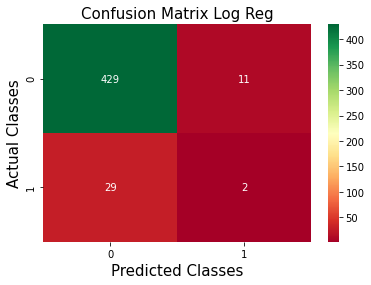

In [407]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix Log Reg', fontsize = 15);


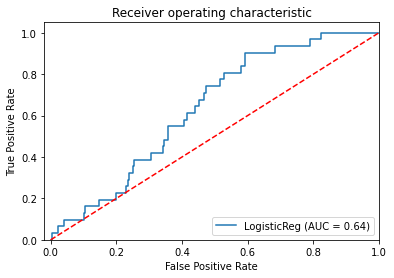

In [408]:
#Plotting ROC and AUC
probs = lg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_lg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='LogisticReg (AUC = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [409]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])


         fpr       tpr     1-fpr        tf  threshold
36  0.413636  0.580645  0.586364 -0.005718   0.033804


In [411]:
# store the predicted probabilities for failed class 
y_pred_prob = lg.predict_proba(X_test)[:, 1]
# predict failed if the predicted probability is greater than 0.033804

y_pred_class = binarize([y_pred_prob], 0.033804)[0]


In [412]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.09      0.58      0.16        31
           0       0.95      0.59      0.73       440

    accuracy                           0.59       471
   macro avg       0.52      0.58      0.44       471
weighted avg       0.90      0.59      0.69       471



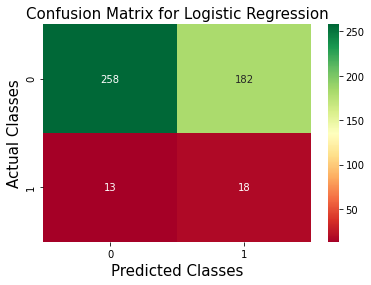

In [413]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15);


In [414]:
precision_lg, recall_lg, f1_score_lg, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_lg)
print('Recall Score :', '%0.2f' % recall_lg)
print('F1-Score:', '%0.2f' % f1_score_lg)
lg_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % lg_acc)
print('AUC :','%0.2f' % roc_auc_lg)
print('Threshold :','%0.2f' % 0.033804)
Thresholdlo=0.033804


Precision Score : 0.52
Recall Score : 0.58
F1-Score: 0.44
Accuracy Score : 0.59
AUC : 0.64
Threshold : 0.03


In [415]:
#SVM with Under Sampled Dataset

In [416]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# Make grid search classifier
svm_grid= GridSearchCV(SVC(), param_grid, verbose = 2,cv=5, n_jobs = -1)
 
# Train the classifier
svm_grid.fit(X_under, y_under)
svm_grid.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [417]:
svc_cv = SVC(kernel = 'sigmoid', gamma = 0.001, C = 1,probability=True)
svc_cv.fit(X_under,y_under)


SVC(C=1, gamma=0.001, kernel='sigmoid', probability=True)

In [418]:
modelsv_score = svc_cv.score(X_under, y_under)
print('Accuracy Score of Training Data: ', modelsv_score)


Accuracy Score of Training Data:  0.680365296803653


In [419]:
y_predictsv= svc_cv.predict(X_test)
modelsv_score = accuracy_score(Y_test, y_predictsv)
print('Accuracy Score of Test Data:', modelsv_score)


Accuracy Score of Test Data: 0.9256900212314225


In [420]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictsv, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.30      0.10      0.15        31
           0       0.94      0.98      0.96       440

    accuracy                           0.93       471
   macro avg       0.62      0.54      0.55       471
weighted avg       0.90      0.93      0.91       471



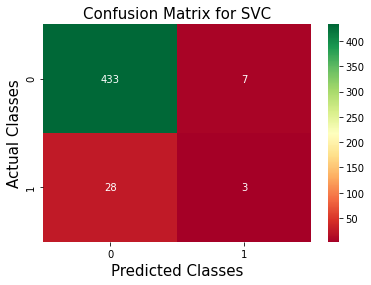

In [421]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictsv)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVC', fontsize = 15);


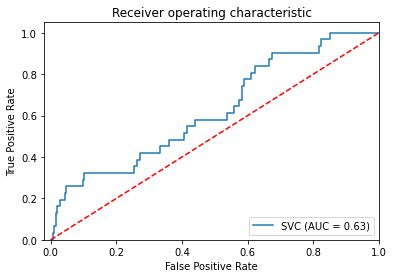

In [422]:
#Plotting ROC and AUC
probs = svc_cv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_sv = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVC (AUC = %0.2f)' % roc_auc_sv)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [423]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])


         fpr       tpr     1-fpr        tf  threshold
34  0.440909  0.548387  0.559091 -0.010704   0.315452


In [424]:
# store the predicted probabilities for failed class 
y_pred_prob = svc_cv.predict_proba(X_test)[:, 1]
# predict failed if the predicted probability is greater than 0.315452
y_pred_class = binarize([y_pred_prob], 0.315452)[0]


In [425]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.08      0.55      0.14        31
           0       0.95      0.56      0.70       440

    accuracy                           0.56       471
   macro avg       0.51      0.55      0.42       471
weighted avg       0.89      0.56      0.67       471



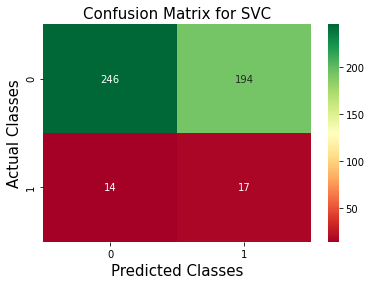

In [426]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVC', fontsize = 15);


In [427]:
precision_sv, recall_sv, f1_score_sv, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_sv)
print('Recall Score :', '%0.2f' % recall_sv)
print('F1-Score:', '%0.2f' % f1_score_sv)
sv_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % sv_acc)
print('AUC :','%0.2f' % roc_auc_sv)
print('Threshold :','%0.2f' % 0.315452)
Thresholdsv=0.315452


Precision Score : 0.51
Recall Score : 0.55
F1-Score: 0.42
Accuracy Score : 0.56
AUC : 0.63
Threshold : 0.32


In [428]:
#Random Forest with Over sampled Dataset

In [429]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}


In [430]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_over, y_over)
rf_random.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 463,
 'min_samples_split': 82,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': False}

In [431]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_over, y_over)


RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_split=82, n_estimators=463)

In [432]:
modelrfg1_score=rf_grid1.score(X_over,y_over)
print('Accuracy Score of Training Data: ', modelrfg1_score)


Accuracy Score of Training Data:  0.9960886571056062


In [433]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)


Accuracy Score of Test Data: 0.9341825902335457


In [434]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        31
           0       0.93      1.00      0.97       440

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



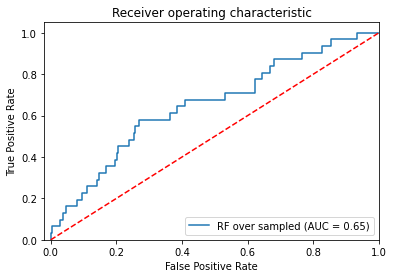

In [435]:
#Plotting ROC and AUC
probs = rf_grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [436]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])


         fpr       tpr     1-fpr        tf  threshold
38  0.384091  0.612903  0.615909 -0.003006   0.160655


In [437]:
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.160655

y_pred_class = binarize([y_pred_prob], 0.160655)[0]


In [438]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.10      0.61      0.17        31
           0       0.96      0.62      0.75       440

    accuracy                           0.62       471
   macro avg       0.53      0.62      0.46       471
weighted avg       0.90      0.62      0.71       471



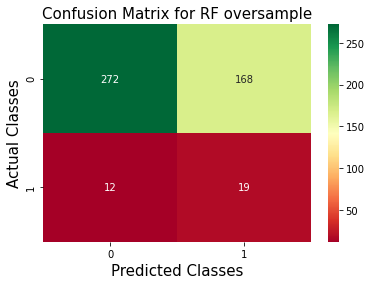

In [439]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF oversample', fontsize = 15);


In [440]:
precision_rfo, recall_rfo, f1_score_rfo, support = precision_recall_fscore_support(Y_test, y_pred_class, average = 'macro')
print('Precision Score :', '%0.2f' % precision_rfo)
print('Recall Score :', '%0.2f' % recall_rfo)
print('F1-Score:', '%0.2f' % f1_score_rfo)
rfo_acc= accuracy_score(Y_test, y_pred_class)
print('Accuracy Score :','%0.2f' % rfo_acc)
print('AUC :','%0.2f' % roc_auc_rfo)
print('Threshold :','%0.2f' % 0.160655)
Thresholdrf=0.160655


Precision Score : 0.53
Recall Score : 0.62
F1-Score: 0.46
Accuracy Score : 0.62
AUC : 0.65
Threshold : 0.16


In [441]:
modellists = []
modellists.append(['Logistic Normal Data', lg_acc * 100, recall_lg * 100, precision_lg * 100,roc_auc_lg*100,f1_score_lg*100,Thresholdlo])
modellists.append(['SVM Under sampled data', sv_acc* 100, recall_sv * 100, precision_sv* 100,roc_auc_sv*100,f1_score_sv*100,Thresholdsv])
modellists.append(['Random Forest Over sampled Data', rfo_acc * 100, recall_rfo * 100, precision_rfo * 100,roc_auc_rfo*100,f1_score_rfo*100,Thresholdrf])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Scores on Test', 'Recall Score', 'Precision Score','AUC','F1 Score','Threshold'])
model_df

,Model,Accuracy Scores on Test,Recall Score,Precision Score,AUC,F1 Score,Threshold
0,Logistic Normal Data,58.598726,58.350440,52.101476,63.599707,44.079128,0.033804
1,SVM Under sampled data,55.838641,55.373900,51.336128,62.558651,42.167651,0.315452
2,Random Forest Over sampled Data,61.783439,61.554252,52.967538,65.219941,46.284657,0.160655


In [251]:
#F1 Score is 46 and AUC 65 so Random forest is best model.

In [446]:
#making copies of validation dataset
val_pca=pd.DataFrame(val_pca)



val_pca1=val_pca.copy()
val_pca1=pd.DataFrame(val_pca1)
val_pca1=val_pca1.reset_index(drop=True)

val_pca2=val_pca.copy()
val_pca2=pd.DataFrame(val_pca2)
val_pca2=val_pca2.reset_index(drop=True)


In [447]:

svc_cv.fit(X_under,y_under)
pred=svc_cv.predict(val_pca1)
val_pca1['Pass/Fail'] = pred
val_pca1.head(18)




,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,Pass/Fail
0,-1.689971,3.509381,3.036415,-2.872909,0.093811,-1.507824,-1.692337,1.748923,-0.010889,1.744663,...,0.409672,-0.055838,-0.306035,-0.327406,-0.606800,-0.449965,-0.258287,0.680285,0.081530,0
1,-2.259524,1.336135,2.332092,-2.321083,-0.210441,-1.848857,-2.083221,1.130556,-1.771458,2.890878,...,-0.304944,1.356592,0.321246,0.723703,0.544790,-0.783331,-0.499307,0.360753,-0.634845,0
2,0.433832,1.466039,0.867034,-0.418789,0.503312,1.990789,-2.336377,0.509821,-0.708821,2.644875,...,-0.521439,-0.896761,0.467790,0.970805,1.946810,-0.865708,-0.639763,-0.640877,-0.353299,0
3,0.994673,4.369193,2.342322,-1.927007,1.774187,1.421751,-4.956010,-0.375405,6.892083,3.442972,...,1.218882,0.347260,1.003161,-0.840028,0.430105,0.096232,-1.034036,2.204774,0.762268,0
4,0.641840,2.565880,2.078993,-0.193740,1.395441,2.646261,-4.225485,0.117457,2.732549,-1.693974,...,-0.801827,-1.052536,0.900209,1.203442,-0.482002,0.839054,0.378361,0.011907,-0.483963,0
5,2.065943,3.289087,2.823304,-2.552387,1.643857,3.272280,-2.717662,2.724295,-1.339310,-1.776139,...,0.402986,0.339182,0.781933,0.257834,0.115936,0.586292,-0.737722,1.341871,-0.549642,0
6,-1.735688,4.990221,1.991171,-1.455658,0.471263,-1.590555,-2.905350,0.028478,0.492302,0.169895,...,0.460714,0.434550,0.267377,-0.468561,-0.137670,-0.204798,-0.261989,0.511119,0.684966,0
7,1.276691,2.658396,4.058146,-2.967502,0.411303,1.203613,-2.716794,1.258707,-3.642717,0.842480,...,0.502721,1.248325,0.579154,-1.048770,-0.600061,0.529953,-0.431831,-1.383037,-0.531326,0
8,-0.302252,17.619148,-4.410674,4.787976,0.260382,2.623649,-0.803751,2.345775,-6.243536,-3.877532,...,0.477414,2.056612,0.602147,-0.400714,0.870141,-0.031629,-0.180151,-0.579485,-0.306416,1
9,1.297052,4.743161,4.672440,-3.530632,0.997042,2.216741,-2.697777,3.686052,-4.076885,1.941073,...,0.820257,1.730688,0.902583,-0.390081,-0.083018,-0.798730,-0.430547,-0.308095,-0.361103,0


In [448]:
#fitting SVM with threshold
# store the predicted probabilities for failed class 
y_pred_prob = svc_cv.predict_proba(val_pca2)[:, 1]
# predict failed if the predicted probability is greater than 0.315452
pred= binarize([y_pred_prob], 0.315452)[0]
val_pca2['Pass/Fail'] = pred
val_pca2.head(19)


,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,Pass/Fail
0,-1.689971,3.509381,3.036415,-2.872909,0.093811,-1.507824,-1.692337,1.748923,-0.010889,1.744663,...,0.409672,-0.055838,-0.306035,-0.327406,-0.606800,-0.449965,-0.258287,0.680285,0.081530,0.0
1,-2.259524,1.336135,2.332092,-2.321083,-0.210441,-1.848857,-2.083221,1.130556,-1.771458,2.890878,...,-0.304944,1.356592,0.321246,0.723703,0.544790,-0.783331,-0.499307,0.360753,-0.634845,0.0
2,0.433832,1.466039,0.867034,-0.418789,0.503312,1.990789,-2.336377,0.509821,-0.708821,2.644875,...,-0.521439,-0.896761,0.467790,0.970805,1.946810,-0.865708,-0.639763,-0.640877,-0.353299,1.0
3,0.994673,4.369193,2.342322,-1.927007,1.774187,1.421751,-4.956010,-0.375405,6.892083,3.442972,...,1.218882,0.347260,1.003161,-0.840028,0.430105,0.096232,-1.034036,2.204774,0.762268,1.0
4,0.641840,2.565880,2.078993,-0.193740,1.395441,2.646261,-4.225485,0.117457,2.732549,-1.693974,...,-0.801827,-1.052536,0.900209,1.203442,-0.482002,0.839054,0.378361,0.011907,-0.483963,1.0
5,2.065943,3.289087,2.823304,-2.552387,1.643857,3.272280,-2.717662,2.724295,-1.339310,-1.776139,...,0.402986,0.339182,0.781933,0.257834,0.115936,0.586292,-0.737722,1.341871,-0.549642,1.0
6,-1.735688,4.990221,1.991171,-1.455658,0.471263,-1.590555,-2.905350,0.028478,0.492302,0.169895,...,0.460714,0.434550,0.267377,-0.468561,-0.137670,-0.204798,-0.261989,0.511119,0.684966,0.0
7,1.276691,2.658396,4.058146,-2.967502,0.411303,1.203613,-2.716794,1.258707,-3.642717,0.842480,...,0.502721,1.248325,0.579154,-1.048770,-0.600061,0.529953,-0.431831,-1.383037,-0.531326,0.0
8,-0.302252,17.619148,-4.410674,4.787976,0.260382,2.623649,-0.803751,2.345775,-6.243536,-3.877532,...,0.477414,2.056612,0.602147,-0.400714,0.870141,-0.031629,-0.180151,-0.579485,-0.306416,1.0
9,1.297052,4.743161,4.672440,-3.530632,0.997042,2.216741,-2.697777,3.686052,-4.076885,1.941073,...,0.820257,1.730688,0.902583,-0.390081,-0.083018,-0.798730,-0.430547,-0.308095,-0.361103,0.0


In [450]:
#Observations:
    
#1) SVM with random under sampling gives 4 failed observation
#2) SVM with threshold 0.315452 gives 11 failed observation



In [451]:
#Strafied cross validation to check how well Random forest with Random over sampling would perform on an unseen data
stratified_kfold = StratifiedKFold(n_splits = 10, random_state = 25,shuffle=True)
results= cross_val_score(rf_grid1, X_over, y_over, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())


Accuracy Score
Avearge:  0.9915244885833122
Standard deviation:  0.00586122452770559


In [452]:
#On an unseen data Random Forest without PCA ,using random oversampling would give an accuracy of between 
#94% to 99%
#Type 1 are 26 and Type 2 errors are zero.

In [453]:
#Strafied cross validation to check how well SVM with PCA with Random under sampling techniques would perform on an unseen data
stratified_kfold = StratifiedKFold(n_splits = 10, random_state = 55,shuffle=True)
results = cross_val_score(svc_cv, X_under, y_under, cv = stratified_kfold)
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())


Accuracy Score
Avearge:  0.6530303030303031
Standard deviation:  0.03550113489048476


In [454]:
#On an unseen data SVM with PCA ,using random undersampling would give an accuracy of between 44% to 92%
#There are found Type 1 and Type 2 errors.

In [456]:
#Conclusion

#Based on the overall analysis and performances of the model we can go ahead and narrow down 
# the observation that are common to the all the validations sets and infer that these are likely to fail. 
#As far as PCA is considered, the models does better without it,


#Random Forest with Random overrsampling gives the best overall results.
# So that we can use Random Forest with oversampling for future use.

